In [337]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, KFold, learning_curve, validation_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

import seaborn as sb
import time

import keras
from keras.utils import to_categorical

import keras
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

In [338]:
df = pd.read_csv("data/winequality-red.csv", sep=';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [339]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [340]:
encoded_Y = LabelEncoder().fit_transform(y)

y = to_categorical(encoded_Y)

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [341]:
def build_fn(hidden_layer_width=10, hidden_layer_depth=4, activation='relu', learning_rate=.001, input_shape=None):
    nn = keras.Sequential()
    nn.add(keras.layers.Dense(hidden_layer_width, activation=activation, input_shape=(input_shape[1],)))
    
    for i in range(hidden_layer_depth):
        nn.add(keras.layers.Dense(hidden_layer_width, activation=activation))
        
    nn.add(keras.layers.Dense(y.shape[1], activation='softmax'))
    
    nn.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    
    return nn

# DR

### PCA

In [259]:
from sklearn.decomposition import PCA

#### Different Component Choices

In [65]:
# Need to try 3 different component values (after picking, run time and learning curve comparison)
scores = []

for i in [1, 3, 5, 7, 9]:
    pca = PCA(n_components=i).fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)
    cv_score = clf.fit(pca_X_train, y_train, validation_split=.2)
    scores.append(cv_score)

Epoch 1/400


C:\Users\legen\AppData\Local\Temp\ipykernel_22308\1968854247.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 43ms/step - loss: 1.7939 - accuracy: 0.1476 - val_loss: 1.7888 - val_accuracy: 0.1133
Epoch 2/400
4/4 [==============================] - 0s 16ms/step - loss: 1.7856 - accuracy: 0.1613 - val_loss: 1.7804 - val_accuracy: 0.1484
Epoch 3/400
4/4 [==============================] - 0s 13ms/step - loss: 1.7767 - accuracy: 0.1896 - val_loss: 1.7719 - val_accuracy: 0.1953
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 1.7680 - accuracy: 0.2121 - val_loss: 1.7634 - val_accuracy: 0.2266
Epoch 5/400
4/4 [==============================] - 0s 17ms/step - loss: 1.7587 - accuracy: 0.2542 - val_loss: 1.7543 - val_accuracy: 0.2578
Epoch 6/400
4/4 [==============================] - 0s 16ms/step - loss: 1.7487 - accuracy: 0.2933 - val_loss: 1.7438 - val_accuracy: 0.2891
Epoch 7/400
4/4 [==============================] - 0s 15ms/step - loss: 1.7375 - accuracy: 0.3245 - val_loss: 1.7319 - val_accuracy: 0.3164
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 1.1510 - accuracy: 0.4585 - val_loss: 1.1684 - val_accuracy: 0.4297
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1507 - accuracy: 0.4565 - val_loss: 1.1689 - val_accuracy: 0.4297
Epoch 119/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1506 - accuracy: 0.4565 - val_loss: 1.1690 - val_accuracy: 0.4297
Epoch 120/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1505 - accuracy: 0.4585 - val_loss: 1.1689 - val_accuracy: 0.4297
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1505 - accuracy: 0.4536 - val_loss: 1.1683 - val_accuracy: 0.4336
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1506 - accuracy: 0.4526 - val_loss: 1.1682 - val_accuracy: 0.4336
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1503 - accuracy: 0.4585 - val_loss: 1.1683 - val_accuracy: 0.4297
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1481 - accuracy: 0.4565 - val_loss: 1.1675 - val_accuracy: 0.4336
Epoch 176/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1479 - accuracy: 0.4526 - val_loss: 1.1672 - val_accuracy: 0.4336
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1478 - accuracy: 0.4516 - val_loss: 1.1679 - val_accuracy: 0.4297
Epoch 178/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1479 - accuracy: 0.4555 - val_loss: 1.1683 - val_accuracy: 0.4375
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1478 - accuracy: 0.4545 - val_loss: 1.1682 - val_accuracy: 0.4297
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1476 - accuracy: 0.4585 - val_loss: 1.1681 - val_accuracy: 0.4336
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1479 - accuracy: 0.4614 - val_loss: 1.1682 - val_accuracy: 0.4297
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1461 - accuracy: 0.4555 - val_loss: 1.1680 - val_accuracy: 0.4297
Epoch 234/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1460 - accuracy: 0.4575 - val_loss: 1.1680 - val_accuracy: 0.4258
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1464 - accuracy: 0.4565 - val_loss: 1.1677 - val_accuracy: 0.4258
Epoch 236/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1460 - accuracy: 0.4575 - val_loss: 1.1683 - val_accuracy: 0.4336
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1459 - accuracy: 0.4545 - val_loss: 1.1685 - val_accuracy: 0.4336
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1460 - accuracy: 0.4565 - val_loss: 1.1686 - val_accuracy: 0.4258
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1461 - accuracy: 0.4565 - val_loss: 1.1686 - val_accuracy: 0.4297
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1445 - accuracy: 0.4536 - val_loss: 1.1682 - val_accuracy: 0.4336
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1446 - accuracy: 0.4536 - val_loss: 1.1687 - val_accuracy: 0.4414
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1446 - accuracy: 0.4516 - val_loss: 1.1684 - val_accuracy: 0.4336
Epoch 294/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1445 - accuracy: 0.4575 - val_loss: 1.1680 - val_accuracy: 0.4336
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1446 - accuracy: 0.4565 - val_loss: 1.1683 - val_accuracy: 0.4336
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1445 - accuracy: 0.4536 - val_loss: 1.1691 - val_accuracy: 0.4297
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1444 - accuracy: 0.4545 - val_loss: 1.1686 - val_accuracy: 0.4297
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1431 - accuracy: 0.4555 - val_loss: 1.1683 - val_accuracy: 0.4297
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1431 - accuracy: 0.4536 - val_loss: 1.1678 - val_accuracy: 0.4336
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1431 - accuracy: 0.4545 - val_loss: 1.1676 - val_accuracy: 0.4336
Epoch 352/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1435 - accuracy: 0.4545 - val_loss: 1.1681 - val_accuracy: 0.4414
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1434 - accuracy: 0.4545 - val_loss: 1.1683 - val_accuracy: 0.4414
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1430 - accuracy: 0.4536 - val_loss: 1.1680 - val_accuracy: 0.4375
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1429 - accuracy: 0.4555 - val_loss: 1.1682 - val_accuracy: 0.4297
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\1968854247.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.7267 - accuracy: 0.3949 - val_loss: 1.6997 - val_accuracy: 0.4297
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6972 - accuracy: 0.4164 - val_loss: 1.6698 - val_accuracy: 0.4297
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6688 - accuracy: 0.4194 - val_loss: 1.6422 - val_accuracy: 0.4297
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6438 - accuracy: 0.4194 - val_loss: 1.6163 - val_accuracy: 0.4297
Epoch 5/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6177 - accuracy: 0.4194 - val_loss: 1.5919 - val_accuracy: 0.4297
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.5938 - accuracy: 0.4194 - val_loss: 1.5679 - val_accuracy: 0.4297
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.5707 - accuracy: 0.4194 - val_loss: 1.5440 - val_accuracy: 0.4297
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 0.9833 - accuracy: 0.5787 - val_loss: 1.0204 - val_accuracy: 0.5820
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9821 - accuracy: 0.5797 - val_loss: 1.0187 - val_accuracy: 0.5820
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9813 - accuracy: 0.5718 - val_loss: 1.0174 - val_accuracy: 0.5781
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9805 - accuracy: 0.5758 - val_loss: 1.0180 - val_accuracy: 0.5820
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9788 - accuracy: 0.5797 - val_loss: 1.0181 - val_accuracy: 0.5859
Epoch 122/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9781 - accuracy: 0.5826 - val_loss: 1.0173 - val_accuracy: 0.5820
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9771 - accuracy: 0.5826 - val_loss: 1.0163 - val_accuracy: 0.5820
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9397 - accuracy: 0.5943 - val_loss: 1.0089 - val_accuracy: 0.5664
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9396 - accuracy: 0.5924 - val_loss: 1.0090 - val_accuracy: 0.5664
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9393 - accuracy: 0.5914 - val_loss: 1.0085 - val_accuracy: 0.5625
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9384 - accuracy: 0.5934 - val_loss: 1.0095 - val_accuracy: 0.5742
Epoch 179/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9379 - accuracy: 0.5963 - val_loss: 1.0096 - val_accuracy: 0.5742
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9381 - accuracy: 0.5943 - val_loss: 1.0083 - val_accuracy: 0.5703
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9374 - accuracy: 0.5973 - val_loss: 1.0095 - val_accuracy: 0.5781
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9210 - accuracy: 0.6031 - val_loss: 1.0068 - val_accuracy: 0.5625
Epoch 234/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9207 - accuracy: 0.5982 - val_loss: 1.0088 - val_accuracy: 0.5625
Epoch 235/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9206 - accuracy: 0.5973 - val_loss: 1.0076 - val_accuracy: 0.5586
Epoch 236/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9201 - accuracy: 0.6051 - val_loss: 1.0051 - val_accuracy: 0.5625
Epoch 237/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9204 - accuracy: 0.6090 - val_loss: 1.0050 - val_accuracy: 0.5586
Epoch 238/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9199 - accuracy: 0.6002 - val_loss: 1.0072 - val_accuracy: 0.5664
Epoch 239/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9209 - accuracy: 0.6022 - val_loss: 1.0073 - val_accuracy: 0.5664
Epoch 240/400

4/4 [==============================] - 0s 9ms/step - loss: 0.9010 - accuracy: 0.6051 - val_loss: 1.0047 - val_accuracy: 0.5586
Epoch 350/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9009 - accuracy: 0.6031 - val_loss: 1.0050 - val_accuracy: 0.5547
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9005 - accuracy: 0.6051 - val_loss: 1.0051 - val_accuracy: 0.5586
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9003 - accuracy: 0.6061 - val_loss: 1.0049 - val_accuracy: 0.5547
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9012 - accuracy: 0.6070 - val_loss: 1.0034 - val_accuracy: 0.5664
Epoch 354/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9003 - accuracy: 0.6051 - val_loss: 1.0051 - val_accuracy: 0.5625
Epoch 355/400
4/4 [==============================] - 0s 13ms/step - loss: 0.8999 - accuracy: 0.6051 - val_loss: 1.0053 - val_accuracy: 0.5664
Epoch 356/400
4/4 [===

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\1968854247.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7654 - accuracy: 0.0147 - val_loss: 1.7428 - val_accuracy: 0.0430
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7533 - accuracy: 0.0831 - val_loss: 1.7310 - val_accuracy: 0.1484
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 1.7413 - accuracy: 0.1496 - val_loss: 1.7187 - val_accuracy: 0.1836
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7288 - accuracy: 0.2199 - val_loss: 1.7055 - val_accuracy: 0.2852
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7145 - accuracy: 0.3030 - val_loss: 1.6902 - val_accuracy: 0.3594
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6976 - accuracy: 0.3587 - val_loss: 1.6715 - val_accuracy: 0.3906
Epoch 7/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6771 - accuracy: 0.4008 - val_loss: 1.6502 - val_accuracy: 0.4102
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 10ms/step - loss: 0.9422 - accuracy: 0.6197 - val_loss: 0.9864 - val_accuracy: 0.5742
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9408 - accuracy: 0.6158 - val_loss: 0.9890 - val_accuracy: 0.5664
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9401 - accuracy: 0.6139 - val_loss: 0.9892 - val_accuracy: 0.5625
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9397 - accuracy: 0.6129 - val_loss: 0.9908 - val_accuracy: 0.5547
Epoch 121/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9392 - accuracy: 0.6109 - val_loss: 0.9887 - val_accuracy: 0.5586
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9383 - accuracy: 0.6119 - val_loss: 0.9877 - val_accuracy: 0.5625
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9380 - accuracy: 0.6149 - val_loss: 0.9862 - val_accuracy: 0.5664
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9039 - accuracy: 0.6256 - val_loss: 0.9799 - val_accuracy: 0.5664
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9039 - accuracy: 0.6295 - val_loss: 0.9785 - val_accuracy: 0.5742
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9028 - accuracy: 0.6276 - val_loss: 0.9797 - val_accuracy: 0.5664
Epoch 178/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9026 - accuracy: 0.6276 - val_loss: 0.9809 - val_accuracy: 0.5703
Epoch 179/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9020 - accuracy: 0.6246 - val_loss: 0.9799 - val_accuracy: 0.5742
Epoch 180/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9013 - accuracy: 0.6285 - val_loss: 0.9801 - val_accuracy: 0.5703
Epoch 181/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9007 - accuracy: 0.6276 - val_loss: 0.9813 - val_accuracy: 0.5703
Epoch 182/

Epoch 233/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8787 - accuracy: 0.6383 - val_loss: 0.9915 - val_accuracy: 0.5586
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8783 - accuracy: 0.6364 - val_loss: 0.9916 - val_accuracy: 0.5586
Epoch 235/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8778 - accuracy: 0.6373 - val_loss: 0.9896 - val_accuracy: 0.5586
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8780 - accuracy: 0.6344 - val_loss: 0.9898 - val_accuracy: 0.5625
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8771 - accuracy: 0.6383 - val_loss: 0.9916 - val_accuracy: 0.5586
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8769 - accuracy: 0.6364 - val_loss: 0.9944 - val_accuracy: 0.5625
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8766 - accuracy: 0.6383 - val_loss: 0.9917 - val_accuracy: 0.5586
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8594 - accuracy: 0.6364 - val_loss: 1.0067 - val_accuracy: 0.5664
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8594 - accuracy: 0.6364 - val_loss: 1.0052 - val_accuracy: 0.5664
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8588 - accuracy: 0.6364 - val_loss: 1.0042 - val_accuracy: 0.5586
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8588 - accuracy: 0.6364 - val_loss: 1.0060 - val_accuracy: 0.5547
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8584 - accuracy: 0.6364 - val_loss: 1.0063 - val_accuracy: 0.5586
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8581 - accuracy: 0.6344 - val_loss: 1.0070 - val_accuracy: 0.5625
Epoch 297/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8582 - accuracy: 0.6373 - val_loss: 1.0047 - val_accuracy: 0.5625
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8443 - accuracy: 0.6354 - val_loss: 1.0158 - val_accuracy: 0.5508
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8441 - accuracy: 0.6354 - val_loss: 1.0155 - val_accuracy: 0.5547
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8442 - accuracy: 0.6373 - val_loss: 1.0139 - val_accuracy: 0.5586
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8439 - accuracy: 0.6364 - val_loss: 1.0162 - val_accuracy: 0.5547
Epoch 353/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8433 - accuracy: 0.6354 - val_loss: 1.0183 - val_accuracy: 0.5547
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8433 - accuracy: 0.6325 - val_loss: 1.0154 - val_accuracy: 0.5586
Epoch 355/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8437 - accuracy: 0.6334 - val_loss: 1.0144 - val_accuracy: 0.5586
Epoch 35

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\1968854247.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.8063 - accuracy: 0.0665 - val_loss: 1.7943 - val_accuracy: 0.1250
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7854 - accuracy: 0.1486 - val_loss: 1.7725 - val_accuracy: 0.2305
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7645 - accuracy: 0.2522 - val_loss: 1.7507 - val_accuracy: 0.3242
Epoch 4/400
4/4 [==============================] - 0s 9ms/step - loss: 1.7436 - accuracy: 0.3431 - val_loss: 1.7287 - val_accuracy: 0.4180
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7228 - accuracy: 0.3988 - val_loss: 1.7057 - val_accuracy: 0.4258
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 1.7004 - accuracy: 0.4291 - val_loss: 1.6818 - val_accuracy: 0.4414
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 1.6778 - accuracy: 0.4379 - val_loss: 1.6562 - val_accuracy: 0.4414
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 10ms/step - loss: 0.9049 - accuracy: 0.6276 - val_loss: 0.9753 - val_accuracy: 0.5742
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9039 - accuracy: 0.6315 - val_loss: 0.9754 - val_accuracy: 0.5703
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9025 - accuracy: 0.6295 - val_loss: 0.9761 - val_accuracy: 0.5703
Epoch 120/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9020 - accuracy: 0.6266 - val_loss: 0.9769 - val_accuracy: 0.5742
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9010 - accuracy: 0.6266 - val_loss: 0.9764 - val_accuracy: 0.5664
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8999 - accuracy: 0.6285 - val_loss: 0.9750 - val_accuracy: 0.5703
Epoch 123/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8991 - accuracy: 0.6305 - val_loss: 0.9742 - val_accuracy: 0.5742
Epoch 124/400
4/4 [===

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8640 - accuracy: 0.6315 - val_loss: 0.9710 - val_accuracy: 0.5859
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8640 - accuracy: 0.6334 - val_loss: 0.9713 - val_accuracy: 0.5938
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8634 - accuracy: 0.6305 - val_loss: 0.9707 - val_accuracy: 0.5859
Epoch 178/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8628 - accuracy: 0.6354 - val_loss: 0.9699 - val_accuracy: 0.5820
Epoch 179/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8619 - accuracy: 0.6334 - val_loss: 0.9704 - val_accuracy: 0.5938
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8614 - accuracy: 0.6393 - val_loss: 0.9717 - val_accuracy: 0.5938
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8610 - accuracy: 0.6373 - val_loss: 0.9711 - val_accuracy: 0.5938
Epoch 18

Epoch 233/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8354 - accuracy: 0.6422 - val_loss: 0.9765 - val_accuracy: 0.5938
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8347 - accuracy: 0.6413 - val_loss: 0.9777 - val_accuracy: 0.5898
Epoch 235/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8340 - accuracy: 0.6422 - val_loss: 0.9772 - val_accuracy: 0.5859
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8341 - accuracy: 0.6393 - val_loss: 0.9776 - val_accuracy: 0.5898
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8331 - accuracy: 0.6403 - val_loss: 0.9767 - val_accuracy: 0.5898
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8333 - accuracy: 0.6422 - val_loss: 0.9769 - val_accuracy: 0.5898
Epoch 239/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8326 - accuracy: 0.6413 - val_loss: 0.9783 - val_accuracy: 0.5820
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8149 - accuracy: 0.6481 - val_loss: 0.9933 - val_accuracy: 0.5859
Epoch 292/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8154 - accuracy: 0.6432 - val_loss: 0.9946 - val_accuracy: 0.5859
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8142 - accuracy: 0.6452 - val_loss: 0.9951 - val_accuracy: 0.5898
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8142 - accuracy: 0.6442 - val_loss: 0.9949 - val_accuracy: 0.5859
Epoch 295/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8141 - accuracy: 0.6461 - val_loss: 0.9959 - val_accuracy: 0.5859
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8132 - accuracy: 0.6471 - val_loss: 0.9941 - val_accuracy: 0.5820
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8134 - accuracy: 0.6500 - val_loss: 0.9958 - val_accuracy: 0.5820
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7970 - accuracy: 0.6540 - val_loss: 1.0114 - val_accuracy: 0.5898
Epoch 350/400
4/4 [==============================] - 0s 13ms/step - loss: 0.7970 - accuracy: 0.6559 - val_loss: 1.0111 - val_accuracy: 0.5898
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7969 - accuracy: 0.6559 - val_loss: 1.0108 - val_accuracy: 0.5938
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7965 - accuracy: 0.6530 - val_loss: 1.0121 - val_accuracy: 0.5859
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7969 - accuracy: 0.6471 - val_loss: 1.0127 - val_accuracy: 0.5898
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7957 - accuracy: 0.6530 - val_loss: 1.0120 - val_accuracy: 0.5859
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7962 - accuracy: 0.6569 - val_loss: 1.0134 - val_accuracy: 0.5859
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\1968854247.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 1s 37ms/step - loss: 1.7912 - accuracy: 0.0792 - val_loss: 1.7729 - val_accuracy: 0.1328
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7719 - accuracy: 0.1984 - val_loss: 1.7541 - val_accuracy: 0.3086
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7545 - accuracy: 0.3314 - val_loss: 1.7376 - val_accuracy: 0.3516
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7387 - accuracy: 0.3695 - val_loss: 1.7216 - val_accuracy: 0.3672
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7226 - accuracy: 0.3803 - val_loss: 1.7054 - val_accuracy: 0.3828
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7068 - accuracy: 0.3920 - val_loss: 1.6877 - val_accuracy: 0.3984
Epoch 7/400
4/4 [==============================] - 0s 14ms/step - loss: 1.6894 - accuracy: 0.4027 - val_loss: 1.6688 - val_accuracy: 0.4023
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 0.8863 - accuracy: 0.6452 - val_loss: 0.9632 - val_accuracy: 0.6094
Epoch 118/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8851 - accuracy: 0.6442 - val_loss: 0.9630 - val_accuracy: 0.6094
Epoch 119/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8843 - accuracy: 0.6471 - val_loss: 0.9620 - val_accuracy: 0.6094
Epoch 120/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8831 - accuracy: 0.6471 - val_loss: 0.9617 - val_accuracy: 0.6133
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8822 - accuracy: 0.6452 - val_loss: 0.9626 - val_accuracy: 0.6094
Epoch 122/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8815 - accuracy: 0.6500 - val_loss: 0.9628 - val_accuracy: 0.6016
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8804 - accuracy: 0.6491 - val_loss: 0.9617 - val_accuracy: 0.6094
Epoch 124/400
4/4 [===

Epoch 175/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8422 - accuracy: 0.6579 - val_loss: 0.9546 - val_accuracy: 0.5977
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8408 - accuracy: 0.6559 - val_loss: 0.9580 - val_accuracy: 0.6172
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8412 - accuracy: 0.6510 - val_loss: 0.9569 - val_accuracy: 0.6016
Epoch 178/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8386 - accuracy: 0.6579 - val_loss: 0.9559 - val_accuracy: 0.6016
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8381 - accuracy: 0.6579 - val_loss: 0.9539 - val_accuracy: 0.6055
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8384 - accuracy: 0.6569 - val_loss: 0.9547 - val_accuracy: 0.6055
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8367 - accuracy: 0.6530 - val_loss: 0.9570 - val_accuracy: 0.5977
Epoch 18

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8076 - accuracy: 0.6735 - val_loss: 0.9556 - val_accuracy: 0.5977
Epoch 234/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8062 - accuracy: 0.6745 - val_loss: 0.9574 - val_accuracy: 0.6016
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8068 - accuracy: 0.6745 - val_loss: 0.9577 - val_accuracy: 0.6055
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8058 - accuracy: 0.6725 - val_loss: 0.9559 - val_accuracy: 0.6016
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8050 - accuracy: 0.6706 - val_loss: 0.9564 - val_accuracy: 0.6055
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8048 - accuracy: 0.6716 - val_loss: 0.9571 - val_accuracy: 0.6094
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8038 - accuracy: 0.6774 - val_loss: 0.9528 - val_accuracy: 0.6016
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7791 - accuracy: 0.6872 - val_loss: 0.9574 - val_accuracy: 0.6055
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7789 - accuracy: 0.6872 - val_loss: 0.9589 - val_accuracy: 0.6055
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7780 - accuracy: 0.6901 - val_loss: 0.9559 - val_accuracy: 0.6094
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7776 - accuracy: 0.6911 - val_loss: 0.9540 - val_accuracy: 0.6055
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7766 - accuracy: 0.6882 - val_loss: 0.9523 - val_accuracy: 0.6055
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7766 - accuracy: 0.6862 - val_loss: 0.9569 - val_accuracy: 0.6016
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7765 - accuracy: 0.6882 - val_loss: 0.9571 - val_accuracy: 0.6016
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7552 - accuracy: 0.6979 - val_loss: 0.9638 - val_accuracy: 0.6016
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7547 - accuracy: 0.6970 - val_loss: 0.9645 - val_accuracy: 0.6055
Epoch 351/400
4/4 [==============================] - 0s 9ms/step - loss: 0.7538 - accuracy: 0.6970 - val_loss: 0.9627 - val_accuracy: 0.5977
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7536 - accuracy: 0.6999 - val_loss: 0.9639 - val_accuracy: 0.5977
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7533 - accuracy: 0.6989 - val_loss: 0.9675 - val_accuracy: 0.6016
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7535 - accuracy: 0.7028 - val_loss: 0.9651 - val_accuracy: 0.5977
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7522 - accuracy: 0.6999 - val_loss: 0.9694 - val_accuracy: 0.6094
Epoch 3

In [66]:
data = [x.history['val_accuracy'] for x in scores]

In [67]:
plot_df = pd.DataFrame(data=data, index=[1,3,5,7,9]).T

<AxesSubplot:>

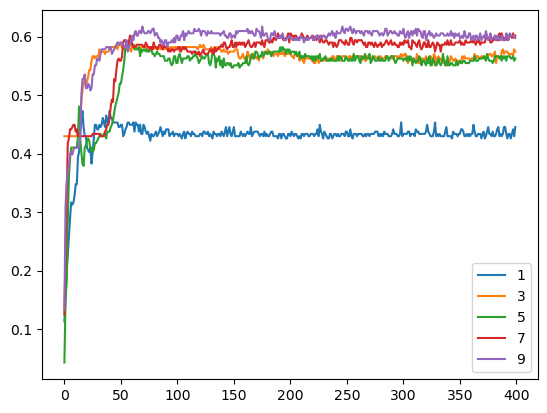

In [68]:
plot_df.plot()

#### 

### ICA

In [260]:
from sklearn.decomposition import FastICA

In [76]:
# Need to try 3 different component values (after picking, run time and learning curve comparison)
scores = []
index = [1, 3, 5, 7, 9]

for i in index:
    pca = FastICA(n_components=i).fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)
    cv_score = clf.fit(pca_X_train, y_train, validation_split=.2)
    scores.append(cv_score)

Epoch 1/400


C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2451619187.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 40ms/step - loss: 1.7882 - accuracy: 0.4194 - val_loss: 1.7817 - val_accuracy: 0.4297
Epoch 2/400
4/4 [==============================] - 0s 21ms/step - loss: 1.7781 - accuracy: 0.4194 - val_loss: 1.7702 - val_accuracy: 0.4297
Epoch 3/400
4/4 [==============================] - 0s 20ms/step - loss: 1.7661 - accuracy: 0.4194 - val_loss: 1.7572 - val_accuracy: 0.4297
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 1.7532 - accuracy: 0.4194 - val_loss: 1.7430 - val_accuracy: 0.4297
Epoch 5/400
4/4 [==============================] - 0s 21ms/step - loss: 1.7390 - accuracy: 0.4194 - val_loss: 1.7276 - val_accuracy: 0.4297
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 1.7236 - accuracy: 0.4194 - val_loss: 1.7108 - val_accuracy: 0.4297
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7065 - accuracy: 0.4194 - val_loss: 1.6924 - val_accuracy: 0.4297
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 1.1727 - accuracy: 0.4213 - val_loss: 1.1927 - val_accuracy: 0.4375
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1726 - accuracy: 0.4203 - val_loss: 1.1925 - val_accuracy: 0.4414
Epoch 119/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1726 - accuracy: 0.4213 - val_loss: 1.1923 - val_accuracy: 0.4375
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1726 - accuracy: 0.4223 - val_loss: 1.1922 - val_accuracy: 0.4453
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1725 - accuracy: 0.4194 - val_loss: 1.1921 - val_accuracy: 0.4375
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1726 - accuracy: 0.4213 - val_loss: 1.1921 - val_accuracy: 0.4453
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1723 - accuracy: 0.4203 - val_loss: 1.1922 - val_accuracy: 0.4414
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1695 - accuracy: 0.4379 - val_loss: 1.1872 - val_accuracy: 0.4258
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1694 - accuracy: 0.4360 - val_loss: 1.1873 - val_accuracy: 0.4258
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1693 - accuracy: 0.4350 - val_loss: 1.1872 - val_accuracy: 0.4258
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1693 - accuracy: 0.4389 - val_loss: 1.1869 - val_accuracy: 0.4258
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1693 - accuracy: 0.4379 - val_loss: 1.1865 - val_accuracy: 0.4258
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1691 - accuracy: 0.4389 - val_loss: 1.1865 - val_accuracy: 0.4258
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1690 - accuracy: 0.4379 - val_loss: 1.1866 - val_accuracy: 0.4258
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1662 - accuracy: 0.4350 - val_loss: 1.1825 - val_accuracy: 0.4258
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1661 - accuracy: 0.4321 - val_loss: 1.1823 - val_accuracy: 0.4297
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1662 - accuracy: 0.4262 - val_loss: 1.1822 - val_accuracy: 0.4297
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1660 - accuracy: 0.4321 - val_loss: 1.1820 - val_accuracy: 0.4336
Epoch 237/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1660 - accuracy: 0.4311 - val_loss: 1.1819 - val_accuracy: 0.4258
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1662 - accuracy: 0.4301 - val_loss: 1.1819 - val_accuracy: 0.4336
Epoch 239/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1661 - accuracy: 0.4360 - val_loss: 1.1820 - val_accuracy: 0.4297
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1642 - accuracy: 0.4379 - val_loss: 1.1785 - val_accuracy: 0.4297
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1639 - accuracy: 0.4457 - val_loss: 1.1784 - val_accuracy: 0.4297
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1639 - accuracy: 0.4370 - val_loss: 1.1784 - val_accuracy: 0.4297
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1638 - accuracy: 0.4350 - val_loss: 1.1785 - val_accuracy: 0.4297
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1638 - accuracy: 0.4282 - val_loss: 1.1786 - val_accuracy: 0.4297
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1639 - accuracy: 0.4301 - val_loss: 1.1787 - val_accuracy: 0.4258
Epoch 297/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1640 - accuracy: 0.4282 - val_loss: 1.1786 - val_accuracy: 0.4336
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1623 - accuracy: 0.4477 - val_loss: 1.1763 - val_accuracy: 0.4336
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1624 - accuracy: 0.4487 - val_loss: 1.1762 - val_accuracy: 0.4336
Epoch 351/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1624 - accuracy: 0.4506 - val_loss: 1.1762 - val_accuracy: 0.4297
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1622 - accuracy: 0.4467 - val_loss: 1.1763 - val_accuracy: 0.4297
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1627 - accuracy: 0.4487 - val_loss: 1.1768 - val_accuracy: 0.4219
Epoch 354/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1624 - accuracy: 0.4467 - val_loss: 1.1762 - val_accuracy: 0.4297
Epoch 355/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1626 - accuracy: 0.4379 - val_loss: 1.1762 - val_accuracy: 0.4453
Epoch 3

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2451619187.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.7870 - accuracy: 0.3832 - val_loss: 1.7773 - val_accuracy: 0.4375
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7724 - accuracy: 0.4262 - val_loss: 1.7598 - val_accuracy: 0.4141
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7546 - accuracy: 0.4066 - val_loss: 1.7400 - val_accuracy: 0.4141
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7347 - accuracy: 0.4027 - val_loss: 1.7186 - val_accuracy: 0.4102
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7130 - accuracy: 0.4027 - val_loss: 1.6955 - val_accuracy: 0.4102
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6904 - accuracy: 0.4027 - val_loss: 1.6705 - val_accuracy: 0.4102
Epoch 7/400
4/4 [==============================] - 0s 12ms/step - loss: 1.6652 - accuracy: 0.4027 - val_loss: 1.6435 - val_accuracy: 0.4102
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 0.9839 - accuracy: 0.5767 - val_loss: 0.9976 - val_accuracy: 0.5586
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9827 - accuracy: 0.5728 - val_loss: 0.9968 - val_accuracy: 0.5625
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9830 - accuracy: 0.5777 - val_loss: 0.9972 - val_accuracy: 0.5586
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9820 - accuracy: 0.5767 - val_loss: 0.9964 - val_accuracy: 0.5586
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9822 - accuracy: 0.5728 - val_loss: 0.9958 - val_accuracy: 0.5625
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9815 - accuracy: 0.5738 - val_loss: 0.9965 - val_accuracy: 0.5547
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9809 - accuracy: 0.5787 - val_loss: 0.9960 - val_accuracy: 0.5586
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9721 - accuracy: 0.5748 - val_loss: 0.9864 - val_accuracy: 0.5625
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9728 - accuracy: 0.5679 - val_loss: 0.9851 - val_accuracy: 0.5508
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9708 - accuracy: 0.5738 - val_loss: 0.9858 - val_accuracy: 0.5586
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9712 - accuracy: 0.5738 - val_loss: 0.9868 - val_accuracy: 0.5547
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9708 - accuracy: 0.5748 - val_loss: 0.9856 - val_accuracy: 0.5508
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9706 - accuracy: 0.5758 - val_loss: 0.9854 - val_accuracy: 0.5547
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9703 - accuracy: 0.5777 - val_loss: 0.9851 - val_accuracy: 0.5547
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9654 - accuracy: 0.5748 - val_loss: 0.9811 - val_accuracy: 0.5508
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9655 - accuracy: 0.5728 - val_loss: 0.9821 - val_accuracy: 0.5547
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9651 - accuracy: 0.5718 - val_loss: 0.9814 - val_accuracy: 0.5547
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9655 - accuracy: 0.5738 - val_loss: 0.9816 - val_accuracy: 0.5547
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9649 - accuracy: 0.5738 - val_loss: 0.9818 - val_accuracy: 0.5547
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9652 - accuracy: 0.5758 - val_loss: 0.9813 - val_accuracy: 0.5469
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9650 - accuracy: 0.5728 - val_loss: 0.9817 - val_accuracy: 0.5547
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9613 - accuracy: 0.5758 - val_loss: 0.9778 - val_accuracy: 0.5625
Epoch 292/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9611 - accuracy: 0.5738 - val_loss: 0.9797 - val_accuracy: 0.5664
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9605 - accuracy: 0.5689 - val_loss: 0.9781 - val_accuracy: 0.5508
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9618 - accuracy: 0.5738 - val_loss: 0.9783 - val_accuracy: 0.5508
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9611 - accuracy: 0.5738 - val_loss: 0.9803 - val_accuracy: 0.5586
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9608 - accuracy: 0.5728 - val_loss: 0.9783 - val_accuracy: 0.5625
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9608 - accuracy: 0.5718 - val_loss: 0.9772 - val_accuracy: 0.5469
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9562 - accuracy: 0.5797 - val_loss: 0.9732 - val_accuracy: 0.5586
Epoch 350/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9555 - accuracy: 0.5767 - val_loss: 0.9732 - val_accuracy: 0.5586
Epoch 351/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9555 - accuracy: 0.5748 - val_loss: 0.9726 - val_accuracy: 0.5625
Epoch 352/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9548 - accuracy: 0.5806 - val_loss: 0.9735 - val_accuracy: 0.5703
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9555 - accuracy: 0.5777 - val_loss: 0.9731 - val_accuracy: 0.5664
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9548 - accuracy: 0.5816 - val_loss: 0.9726 - val_accuracy: 0.5586
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9552 - accuracy: 0.5836 - val_loss: 0.9723 - val_accuracy: 0.5664
Epoch 3

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2451619187.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7887 - accuracy: 0.3451 - val_loss: 1.7831 - val_accuracy: 0.4102
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7800 - accuracy: 0.4037 - val_loss: 1.7739 - val_accuracy: 0.4102
Epoch 3/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7704 - accuracy: 0.4027 - val_loss: 1.7636 - val_accuracy: 0.4102
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7601 - accuracy: 0.4027 - val_loss: 1.7519 - val_accuracy: 0.4102
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7479 - accuracy: 0.4027 - val_loss: 1.7384 - val_accuracy: 0.4102
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7339 - accuracy: 0.4027 - val_loss: 1.7233 - val_accuracy: 0.4102
Epoch 7/400
4/4 [==============================] - 0s 9ms/step - loss: 1.7187 - accuracy: 0.4027 - val_loss: 1.7067 - val_accuracy: 0.4102
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 11ms/step - loss: 0.9752 - accuracy: 0.5914 - val_loss: 0.9854 - val_accuracy: 0.5781
Epoch 118/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9748 - accuracy: 0.5934 - val_loss: 0.9860 - val_accuracy: 0.5742
Epoch 119/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9750 - accuracy: 0.5904 - val_loss: 0.9847 - val_accuracy: 0.5781
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9742 - accuracy: 0.5904 - val_loss: 0.9840 - val_accuracy: 0.5859
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9749 - accuracy: 0.5924 - val_loss: 0.9843 - val_accuracy: 0.5781
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9737 - accuracy: 0.5924 - val_loss: 0.9837 - val_accuracy: 0.5820
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9733 - accuracy: 0.5904 - val_loss: 0.9837 - val_accuracy: 0.5820
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9645 - accuracy: 0.5904 - val_loss: 0.9730 - val_accuracy: 0.5820
Epoch 176/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9643 - accuracy: 0.5904 - val_loss: 0.9736 - val_accuracy: 0.5742
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9646 - accuracy: 0.5904 - val_loss: 0.9736 - val_accuracy: 0.5742
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9656 - accuracy: 0.5924 - val_loss: 0.9724 - val_accuracy: 0.5742
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9634 - accuracy: 0.5914 - val_loss: 0.9741 - val_accuracy: 0.5664
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9646 - accuracy: 0.5885 - val_loss: 0.9740 - val_accuracy: 0.5625
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9632 - accuracy: 0.5904 - val_loss: 0.9719 - val_accuracy: 0.5742
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9572 - accuracy: 0.5885 - val_loss: 0.9650 - val_accuracy: 0.5781
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9567 - accuracy: 0.5875 - val_loss: 0.9672 - val_accuracy: 0.5820
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9571 - accuracy: 0.5934 - val_loss: 0.9659 - val_accuracy: 0.5781
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9554 - accuracy: 0.5885 - val_loss: 0.9648 - val_accuracy: 0.5781
Epoch 237/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9566 - accuracy: 0.5875 - val_loss: 0.9646 - val_accuracy: 0.5703
Epoch 238/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9549 - accuracy: 0.5875 - val_loss: 0.9669 - val_accuracy: 0.5820
Epoch 239/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9559 - accuracy: 0.5943 - val_loss: 0.9662 - val_accuracy: 0.5742
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9470 - accuracy: 0.5943 - val_loss: 0.9588 - val_accuracy: 0.5898
Epoch 292/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9461 - accuracy: 0.5973 - val_loss: 0.9587 - val_accuracy: 0.5898
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9461 - accuracy: 0.5973 - val_loss: 0.9585 - val_accuracy: 0.5859
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9463 - accuracy: 0.5934 - val_loss: 0.9583 - val_accuracy: 0.5898
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9464 - accuracy: 0.5982 - val_loss: 0.9596 - val_accuracy: 0.5781
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9461 - accuracy: 0.5953 - val_loss: 0.9577 - val_accuracy: 0.5859
Epoch 297/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9458 - accuracy: 0.5934 - val_loss: 0.9579 - val_accuracy: 0.5898
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9376 - accuracy: 0.5973 - val_loss: 0.9522 - val_accuracy: 0.5938
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9376 - accuracy: 0.5953 - val_loss: 0.9534 - val_accuracy: 0.5898
Epoch 351/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9362 - accuracy: 0.6031 - val_loss: 0.9512 - val_accuracy: 0.5859
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9368 - accuracy: 0.5885 - val_loss: 0.9509 - val_accuracy: 0.5898
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9357 - accuracy: 0.6012 - val_loss: 0.9540 - val_accuracy: 0.5820
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9357 - accuracy: 0.5963 - val_loss: 0.9504 - val_accuracy: 0.5938
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9364 - accuracy: 0.5963 - val_loss: 0.9500 - val_accuracy: 0.5938
Epoch 

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2451619187.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7886 - accuracy: 0.2933 - val_loss: 1.7832 - val_accuracy: 0.3672
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7800 - accuracy: 0.3900 - val_loss: 1.7738 - val_accuracy: 0.4102
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7702 - accuracy: 0.3998 - val_loss: 1.7638 - val_accuracy: 0.4102
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7598 - accuracy: 0.4027 - val_loss: 1.7529 - val_accuracy: 0.3906
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7488 - accuracy: 0.3988 - val_loss: 1.7411 - val_accuracy: 0.4023
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7366 - accuracy: 0.3959 - val_loss: 1.7286 - val_accuracy: 0.4141
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7236 - accuracy: 0.4057 - val_loss: 1.7151 - val_accuracy: 0.4141
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 1.0439 - accuracy: 0.5699 - val_loss: 1.0412 - val_accuracy: 0.5859
Epoch 118/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0401 - accuracy: 0.5728 - val_loss: 1.0384 - val_accuracy: 0.5938
Epoch 119/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0369 - accuracy: 0.5718 - val_loss: 1.0359 - val_accuracy: 0.5938
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0343 - accuracy: 0.5699 - val_loss: 1.0335 - val_accuracy: 0.5859
Epoch 121/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0312 - accuracy: 0.5650 - val_loss: 1.0309 - val_accuracy: 0.5938
Epoch 122/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0291 - accuracy: 0.5640 - val_loss: 1.0285 - val_accuracy: 0.5859
Epoch 123/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0255 - accuracy: 0.5650 - val_loss: 1.0256 - val_accuracy: 0.5938
Epoch 124/400
4/4 [=======

Epoch 175/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9465 - accuracy: 0.6119 - val_loss: 0.9756 - val_accuracy: 0.5898
Epoch 176/400
4/4 [==============================] - 0s 14ms/step - loss: 0.9477 - accuracy: 0.6139 - val_loss: 0.9757 - val_accuracy: 0.5898
Epoch 177/400
4/4 [==============================] - 0s 19ms/step - loss: 0.9475 - accuracy: 0.6100 - val_loss: 0.9750 - val_accuracy: 0.5977
Epoch 178/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9471 - accuracy: 0.6100 - val_loss: 0.9747 - val_accuracy: 0.5938
Epoch 179/400
4/4 [==============================] - 0s 18ms/step - loss: 0.9451 - accuracy: 0.6100 - val_loss: 0.9745 - val_accuracy: 0.5859
Epoch 180/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9457 - accuracy: 0.6109 - val_loss: 0.9743 - val_accuracy: 0.5898
Epoch 181/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9442 - accuracy: 0.6109 - val_loss: 0.9731 - val_accuracy: 0.5938
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9317 - accuracy: 0.6109 - val_loss: 0.9667 - val_accuracy: 0.6016
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9334 - accuracy: 0.6100 - val_loss: 0.9671 - val_accuracy: 0.6016
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9318 - accuracy: 0.6090 - val_loss: 0.9676 - val_accuracy: 0.5898
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9319 - accuracy: 0.6119 - val_loss: 0.9672 - val_accuracy: 0.5898
Epoch 237/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9316 - accuracy: 0.6119 - val_loss: 0.9664 - val_accuracy: 0.5977
Epoch 238/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9313 - accuracy: 0.6119 - val_loss: 0.9657 - val_accuracy: 0.6016
Epoch 239/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9319 - accuracy: 0.6119 - val_loss: 0.9658 - val_accuracy: 0.6016
Epoch 240/4

4/4 [==============================] - 0s 8ms/step - loss: 0.9235 - accuracy: 0.6119 - val_loss: 0.9621 - val_accuracy: 0.6016
Epoch 292/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9218 - accuracy: 0.6080 - val_loss: 0.9628 - val_accuracy: 0.5859
Epoch 293/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9226 - accuracy: 0.6051 - val_loss: 0.9629 - val_accuracy: 0.5859
Epoch 294/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9220 - accuracy: 0.6061 - val_loss: 0.9620 - val_accuracy: 0.6016
Epoch 295/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9223 - accuracy: 0.6090 - val_loss: 0.9623 - val_accuracy: 0.6133
Epoch 296/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9233 - accuracy: 0.6031 - val_loss: 0.9627 - val_accuracy: 0.5859
Epoch 297/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9220 - accuracy: 0.6051 - val_loss: 0.9620 - val_accuracy: 0.5938
Epoch 298/400
4/4 [========

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2451619187.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 34ms/step - loss: 1.7899 - accuracy: 0.2659 - val_loss: 1.7847 - val_accuracy: 0.3945
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7820 - accuracy: 0.3803 - val_loss: 1.7757 - val_accuracy: 0.3984
Epoch 3/400
4/4 [==============================] - 0s 7ms/step - loss: 1.7734 - accuracy: 0.4037 - val_loss: 1.7660 - val_accuracy: 0.4102
Epoch 4/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7642 - accuracy: 0.4037 - val_loss: 1.7555 - val_accuracy: 0.4102
Epoch 5/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7541 - accuracy: 0.4027 - val_loss: 1.7442 - val_accuracy: 0.4102
Epoch 6/400
4/4 [==============================] - 0s 7ms/step - loss: 1.7434 - accuracy: 0.4027 - val_loss: 1.7319 - val_accuracy: 0.4102
Epoch 7/400
4/4 [==============================] - 0s 7ms/step - loss: 1.7312 - accuracy: 0.4027 - val_loss: 1.7182 - val_accuracy: 0.4102
Epoch 8/400
4/4 [=====================

4/4 [==============================] - 0s 9ms/step - loss: 0.9954 - accuracy: 0.5826 - val_loss: 1.0133 - val_accuracy: 0.6016
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9936 - accuracy: 0.5846 - val_loss: 1.0110 - val_accuracy: 0.6016
Epoch 119/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9915 - accuracy: 0.5885 - val_loss: 1.0098 - val_accuracy: 0.6016
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9901 - accuracy: 0.5865 - val_loss: 1.0088 - val_accuracy: 0.5977
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9881 - accuracy: 0.5836 - val_loss: 1.0079 - val_accuracy: 0.6016
Epoch 122/400
4/4 [==============================] - 0s 13ms/step - loss: 0.9866 - accuracy: 0.5826 - val_loss: 1.0061 - val_accuracy: 0.6016
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9865 - accuracy: 0.5855 - val_loss: 1.0043 - val_accuracy: 0.5977
Epoch 124/400
4/4 [===

4/4 [==============================] - 0s 8ms/step - loss: 0.9261 - accuracy: 0.6266 - val_loss: 0.9611 - val_accuracy: 0.5938
Epoch 234/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9261 - accuracy: 0.6295 - val_loss: 0.9592 - val_accuracy: 0.6016
Epoch 235/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9252 - accuracy: 0.6315 - val_loss: 0.9598 - val_accuracy: 0.5898
Epoch 236/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9248 - accuracy: 0.6334 - val_loss: 0.9605 - val_accuracy: 0.5938
Epoch 237/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9245 - accuracy: 0.6315 - val_loss: 0.9601 - val_accuracy: 0.5977
Epoch 238/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9240 - accuracy: 0.6266 - val_loss: 0.9603 - val_accuracy: 0.5898
Epoch 239/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9238 - accuracy: 0.6295 - val_loss: 0.9594 - val_accuracy: 0.5977
Epoch 240/400
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.8993 - accuracy: 0.6403 - val_loss: 0.9469 - val_accuracy: 0.6016
Epoch 350/400
4/4 [==============================] - 0s 7ms/step - loss: 0.8980 - accuracy: 0.6413 - val_loss: 0.9457 - val_accuracy: 0.6055
Epoch 351/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8980 - accuracy: 0.6373 - val_loss: 0.9460 - val_accuracy: 0.6016
Epoch 352/400
4/4 [==============================] - 0s 7ms/step - loss: 0.8980 - accuracy: 0.6383 - val_loss: 0.9456 - val_accuracy: 0.6055
Epoch 353/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8977 - accuracy: 0.6413 - val_loss: 0.9477 - val_accuracy: 0.5977
Epoch 354/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8975 - accuracy: 0.6403 - val_loss: 0.9461 - val_accuracy: 0.6016
Epoch 355/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8988 - accuracy: 0.6403 - val_loss: 0.9453 - val_accuracy: 0.6016
Epoch 356/400
4/4 [========

In [77]:
data = [x.history['val_accuracy'] for x in scores]

In [78]:
plot_df = pd.DataFrame(data=data, index=index).T

<AxesSubplot:>

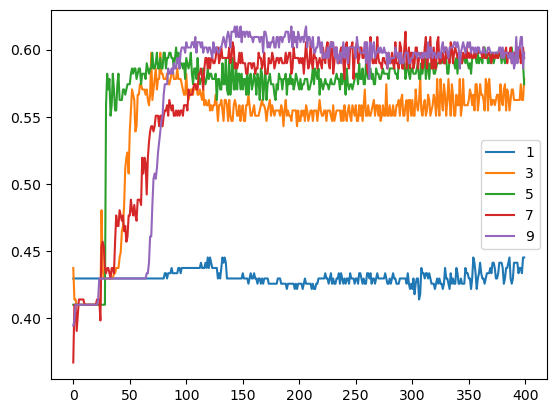

In [79]:
plot_df.plot()

### RP

In [262]:
from sklearn.random_projection import GaussianRandomProjection

In [81]:
# Need to try 3 different component values (after picking, run time and learning curve comparison)
scores = []
index = [1, 3, 5, 7, 9]

for i in index:
    pca = GaussianRandomProjection(n_components=i).fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)
    cv_score = clf.fit(pca_X_train, y_train, validation_split=.2)
    scores.append(cv_score)

Epoch 1/400


C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3427944898.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 42ms/step - loss: 1.8496 - accuracy: 0.0215 - val_loss: 1.8399 - val_accuracy: 0.0508
Epoch 2/400
4/4 [==============================] - 0s 22ms/step - loss: 1.8250 - accuracy: 0.0645 - val_loss: 1.8189 - val_accuracy: 0.0859
Epoch 3/400
4/4 [==============================] - 0s 17ms/step - loss: 1.8054 - accuracy: 0.1281 - val_loss: 1.8015 - val_accuracy: 0.1719
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 1.7889 - accuracy: 0.2209 - val_loss: 1.7866 - val_accuracy: 0.2773
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 1.7745 - accuracy: 0.2757 - val_loss: 1.7733 - val_accuracy: 0.3164
Epoch 6/400
4/4 [==============================] - 0s 15ms/step - loss: 1.7618 - accuracy: 0.3128 - val_loss: 1.7621 - val_accuracy: 0.3398
Epoch 7/400
4/4 [==============================] - 0s 17ms/step - loss: 1.7510 - accuracy: 0.3187 - val_loss: 1.7520 - val_accuracy: 0.3555
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 1.1680 - accuracy: 0.4282 - val_loss: 1.1909 - val_accuracy: 0.4453
Epoch 118/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1678 - accuracy: 0.4282 - val_loss: 1.1908 - val_accuracy: 0.4492
Epoch 119/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1678 - accuracy: 0.4282 - val_loss: 1.1909 - val_accuracy: 0.4531
Epoch 120/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1679 - accuracy: 0.4291 - val_loss: 1.1911 - val_accuracy: 0.4492
Epoch 121/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1677 - accuracy: 0.4301 - val_loss: 1.1910 - val_accuracy: 0.4492
Epoch 122/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1677 - accuracy: 0.4282 - val_loss: 1.1912 - val_accuracy: 0.4492
Epoch 123/400
4/4 [==============================] - 0s 8ms/step - loss: 1.1676 - accuracy: 0.4262 - val_loss: 1.1909 - val_accuracy: 0.4531
Epoch 124/400
4/4 [========

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1630 - accuracy: 0.4340 - val_loss: 1.1960 - val_accuracy: 0.4453
Epoch 234/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1627 - accuracy: 0.4350 - val_loss: 1.1964 - val_accuracy: 0.4297
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1625 - accuracy: 0.4350 - val_loss: 1.1967 - val_accuracy: 0.4258
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1626 - accuracy: 0.4370 - val_loss: 1.1969 - val_accuracy: 0.4297
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1624 - accuracy: 0.4370 - val_loss: 1.1970 - val_accuracy: 0.4453
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1625 - accuracy: 0.4330 - val_loss: 1.1975 - val_accuracy: 0.4453
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1629 - accuracy: 0.4272 - val_loss: 1.1970 - val_accuracy: 0.4492
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1608 - accuracy: 0.4321 - val_loss: 1.2003 - val_accuracy: 0.4492
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1609 - accuracy: 0.4350 - val_loss: 1.2006 - val_accuracy: 0.4414
Epoch 293/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1611 - accuracy: 0.4350 - val_loss: 1.2016 - val_accuracy: 0.4414
Epoch 294/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1610 - accuracy: 0.4340 - val_loss: 1.2000 - val_accuracy: 0.4453
Epoch 295/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1609 - accuracy: 0.4350 - val_loss: 1.2001 - val_accuracy: 0.4453
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1609 - accuracy: 0.4340 - val_loss: 1.2012 - val_accuracy: 0.4492
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1609 - accuracy: 0.4301 - val_loss: 1.2008 - val_accuracy: 0.4492
Epoch 29

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1590 - accuracy: 0.4311 - val_loss: 1.2040 - val_accuracy: 0.4570
Epoch 350/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1589 - accuracy: 0.4389 - val_loss: 1.2044 - val_accuracy: 0.4609
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1589 - accuracy: 0.4350 - val_loss: 1.2051 - val_accuracy: 0.4531
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1590 - accuracy: 0.4321 - val_loss: 1.2059 - val_accuracy: 0.4531
Epoch 353/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1588 - accuracy: 0.4311 - val_loss: 1.2046 - val_accuracy: 0.4531
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1589 - accuracy: 0.4282 - val_loss: 1.2041 - val_accuracy: 0.4570
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1587 - accuracy: 0.4291 - val_loss: 1.2046 - val_accuracy: 0.4570
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3427944898.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.8103 - accuracy: 0.0538 - val_loss: 1.7866 - val_accuracy: 0.1172
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7864 - accuracy: 0.1603 - val_loss: 1.7655 - val_accuracy: 0.2148
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7677 - accuracy: 0.2004 - val_loss: 1.7488 - val_accuracy: 0.2500
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7516 - accuracy: 0.2229 - val_loss: 1.7338 - val_accuracy: 0.2734
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7378 - accuracy: 0.2317 - val_loss: 1.7187 - val_accuracy: 0.2891
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7231 - accuracy: 0.2463 - val_loss: 1.7029 - val_accuracy: 0.3047
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7081 - accuracy: 0.2698 - val_loss: 1.6858 - val_accuracy: 0.3359
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 1.0256 - accuracy: 0.5523 - val_loss: 1.0726 - val_accuracy: 0.5508
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0246 - accuracy: 0.5513 - val_loss: 1.0726 - val_accuracy: 0.5547
Epoch 119/400
4/4 [==============================] - 0s 12ms/step - loss: 1.0244 - accuracy: 0.5533 - val_loss: 1.0726 - val_accuracy: 0.5469
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0236 - accuracy: 0.5552 - val_loss: 1.0728 - val_accuracy: 0.5469
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0231 - accuracy: 0.5552 - val_loss: 1.0726 - val_accuracy: 0.5586
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0228 - accuracy: 0.5523 - val_loss: 1.0732 - val_accuracy: 0.5586
Epoch 123/400
4/4 [==============================] - 0s 12ms/step - loss: 1.0223 - accuracy: 0.5523 - val_loss: 1.0730 - val_accuracy: 0.5547
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0015 - accuracy: 0.5611 - val_loss: 1.0692 - val_accuracy: 0.5547
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0014 - accuracy: 0.5601 - val_loss: 1.0692 - val_accuracy: 0.5547
Epoch 177/400
4/4 [==============================] - 0s 16ms/step - loss: 1.0009 - accuracy: 0.5582 - val_loss: 1.0692 - val_accuracy: 0.5547
Epoch 178/400
4/4 [==============================] - 0s 8ms/step - loss: 1.0006 - accuracy: 0.5601 - val_loss: 1.0693 - val_accuracy: 0.5586
Epoch 179/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0006 - accuracy: 0.5630 - val_loss: 1.0696 - val_accuracy: 0.5586
Epoch 180/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9999 - accuracy: 0.5650 - val_loss: 1.0692 - val_accuracy: 0.5547
Epoch 181/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9996 - accuracy: 0.5611 - val_loss: 1.0696 - val_accuracy: 0.5547
Epoch 182/

4/4 [==============================] - 0s 7ms/step - loss: 0.9854 - accuracy: 0.5650 - val_loss: 1.0719 - val_accuracy: 0.5664
Epoch 234/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9845 - accuracy: 0.5621 - val_loss: 1.0722 - val_accuracy: 0.5469
Epoch 235/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9841 - accuracy: 0.5601 - val_loss: 1.0727 - val_accuracy: 0.5430
Epoch 236/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9844 - accuracy: 0.5640 - val_loss: 1.0731 - val_accuracy: 0.5469
Epoch 237/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9838 - accuracy: 0.5611 - val_loss: 1.0735 - val_accuracy: 0.5391
Epoch 238/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9832 - accuracy: 0.5611 - val_loss: 1.0729 - val_accuracy: 0.5430
Epoch 239/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9830 - accuracy: 0.5621 - val_loss: 1.0729 - val_accuracy: 0.5508
Epoch 240/400
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.9638 - accuracy: 0.5924 - val_loss: 1.0877 - val_accuracy: 0.5234
Epoch 350/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9647 - accuracy: 0.5894 - val_loss: 1.0881 - val_accuracy: 0.5273
Epoch 351/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9643 - accuracy: 0.5924 - val_loss: 1.0881 - val_accuracy: 0.5234
Epoch 352/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9633 - accuracy: 0.5875 - val_loss: 1.0882 - val_accuracy: 0.5156
Epoch 353/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9632 - accuracy: 0.5826 - val_loss: 1.0877 - val_accuracy: 0.5195
Epoch 354/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9635 - accuracy: 0.5894 - val_loss: 1.0873 - val_accuracy: 0.5273
Epoch 355/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9630 - accuracy: 0.5894 - val_loss: 1.0875 - val_accuracy: 0.5195
Epoch 356/400
4/4 [========

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3427944898.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7818 - accuracy: 0.0567 - val_loss: 1.7613 - val_accuracy: 0.0781
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7645 - accuracy: 0.0929 - val_loss: 1.7462 - val_accuracy: 0.1055
Epoch 3/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7471 - accuracy: 0.1359 - val_loss: 1.7304 - val_accuracy: 0.1367
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7292 - accuracy: 0.1740 - val_loss: 1.7139 - val_accuracy: 0.2031
Epoch 5/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7104 - accuracy: 0.2561 - val_loss: 1.6962 - val_accuracy: 0.2461
Epoch 6/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6899 - accuracy: 0.3060 - val_loss: 1.6758 - val_accuracy: 0.3047
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6670 - accuracy: 0.3343 - val_loss: 1.6528 - val_accuracy: 0.3320
Epoch 8/400
4/4 [==================

4/4 [==============================] - 0s 8ms/step - loss: 1.0315 - accuracy: 0.5533 - val_loss: 1.0651 - val_accuracy: 0.5547
Epoch 118/400
4/4 [==============================] - 0s 8ms/step - loss: 1.0310 - accuracy: 0.5533 - val_loss: 1.0657 - val_accuracy: 0.5508
Epoch 119/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0306 - accuracy: 0.5523 - val_loss: 1.0644 - val_accuracy: 0.5469
Epoch 120/400
4/4 [==============================] - 0s 8ms/step - loss: 1.0303 - accuracy: 0.5552 - val_loss: 1.0642 - val_accuracy: 0.5586
Epoch 121/400
4/4 [==============================] - 0s 8ms/step - loss: 1.0290 - accuracy: 0.5591 - val_loss: 1.0646 - val_accuracy: 0.5586
Epoch 122/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0281 - accuracy: 0.5572 - val_loss: 1.0642 - val_accuracy: 0.5547
Epoch 123/400
4/4 [==============================] - 0s 8ms/step - loss: 1.0274 - accuracy: 0.5523 - val_loss: 1.0625 - val_accuracy: 0.5508
Epoch 124/400
4/4 [========

4/4 [==============================] - 0s 11ms/step - loss: 1.0004 - accuracy: 0.5865 - val_loss: 1.0586 - val_accuracy: 0.5625
Epoch 176/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0001 - accuracy: 0.5846 - val_loss: 1.0580 - val_accuracy: 0.5664
Epoch 177/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9996 - accuracy: 0.5836 - val_loss: 1.0558 - val_accuracy: 0.5664
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9992 - accuracy: 0.5855 - val_loss: 1.0556 - val_accuracy: 0.5703
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9991 - accuracy: 0.5855 - val_loss: 1.0565 - val_accuracy: 0.5664
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9981 - accuracy: 0.5855 - val_loss: 1.0574 - val_accuracy: 0.5664
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9982 - accuracy: 0.5885 - val_loss: 1.0581 - val_accuracy: 0.5625
Epoch 182/400
4/4 [===

4/4 [==============================] - 0s 8ms/step - loss: 0.9587 - accuracy: 0.6041 - val_loss: 1.0555 - val_accuracy: 0.5547
Epoch 292/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9577 - accuracy: 0.6031 - val_loss: 1.0552 - val_accuracy: 0.5586
Epoch 293/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9574 - accuracy: 0.6100 - val_loss: 1.0571 - val_accuracy: 0.5508
Epoch 294/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9572 - accuracy: 0.6100 - val_loss: 1.0578 - val_accuracy: 0.5508
Epoch 295/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9570 - accuracy: 0.6031 - val_loss: 1.0555 - val_accuracy: 0.5586
Epoch 296/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9571 - accuracy: 0.6031 - val_loss: 1.0556 - val_accuracy: 0.5586
Epoch 297/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9563 - accuracy: 0.6061 - val_loss: 1.0568 - val_accuracy: 0.5547
Epoch 298/400
4/4 [========

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3427944898.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 34ms/step - loss: 1.7798 - accuracy: 0.2776 - val_loss: 1.7461 - val_accuracy: 0.3320
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7533 - accuracy: 0.3138 - val_loss: 1.7196 - val_accuracy: 0.3711
Epoch 3/400
4/4 [==============================] - 0s 9ms/step - loss: 1.7301 - accuracy: 0.3548 - val_loss: 1.6958 - val_accuracy: 0.3945
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7095 - accuracy: 0.3900 - val_loss: 1.6745 - val_accuracy: 0.4023
Epoch 5/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6910 - accuracy: 0.3998 - val_loss: 1.6551 - val_accuracy: 0.4102
Epoch 6/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6738 - accuracy: 0.4027 - val_loss: 1.6371 - val_accuracy: 0.4102
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6577 - accuracy: 0.4027 - val_loss: 1.6199 - val_accuracy: 0.4102
Epoch 8/400
4/4 [==================

4/4 [==============================] - 0s 8ms/step - loss: 0.9499 - accuracy: 0.5973 - val_loss: 1.0039 - val_accuracy: 0.5469
Epoch 118/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9486 - accuracy: 0.5943 - val_loss: 1.0037 - val_accuracy: 0.5469
Epoch 119/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9474 - accuracy: 0.5953 - val_loss: 1.0061 - val_accuracy: 0.5391
Epoch 120/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9468 - accuracy: 0.5963 - val_loss: 1.0050 - val_accuracy: 0.5391
Epoch 121/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9455 - accuracy: 0.5982 - val_loss: 1.0047 - val_accuracy: 0.5430
Epoch 122/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9447 - accuracy: 0.6031 - val_loss: 1.0038 - val_accuracy: 0.5430
Epoch 123/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9436 - accuracy: 0.6002 - val_loss: 1.0040 - val_accuracy: 0.5391
Epoch 124/400
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.8852 - accuracy: 0.6334 - val_loss: 1.0318 - val_accuracy: 0.5625
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8859 - accuracy: 0.6256 - val_loss: 1.0322 - val_accuracy: 0.5625
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8854 - accuracy: 0.6295 - val_loss: 1.0344 - val_accuracy: 0.5430
Epoch 236/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8847 - accuracy: 0.6276 - val_loss: 1.0332 - val_accuracy: 0.5547
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8848 - accuracy: 0.6305 - val_loss: 1.0333 - val_accuracy: 0.5625
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8842 - accuracy: 0.6276 - val_loss: 1.0334 - val_accuracy: 0.5625
Epoch 239/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8827 - accuracy: 0.6285 - val_loss: 1.0341 - val_accuracy: 0.5625
Epoch 240/400
4/4 [====

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8647 - accuracy: 0.6393 - val_loss: 1.0458 - val_accuracy: 0.5664
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8650 - accuracy: 0.6344 - val_loss: 1.0455 - val_accuracy: 0.5703
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8644 - accuracy: 0.6354 - val_loss: 1.0468 - val_accuracy: 0.5664
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8643 - accuracy: 0.6403 - val_loss: 1.0487 - val_accuracy: 0.5625
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8641 - accuracy: 0.6403 - val_loss: 1.0491 - val_accuracy: 0.5547
Epoch 296/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8635 - accuracy: 0.6403 - val_loss: 1.0475 - val_accuracy: 0.5742
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8629 - accuracy: 0.6393 - val_loss: 1.0474 - val_accuracy: 0.5586
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8486 - accuracy: 0.6461 - val_loss: 1.0676 - val_accuracy: 0.5625
Epoch 350/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8482 - accuracy: 0.6442 - val_loss: 1.0673 - val_accuracy: 0.5586
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8478 - accuracy: 0.6442 - val_loss: 1.0659 - val_accuracy: 0.5547
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8473 - accuracy: 0.6432 - val_loss: 1.0674 - val_accuracy: 0.5625
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8472 - accuracy: 0.6481 - val_loss: 1.0698 - val_accuracy: 0.5547
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8468 - accuracy: 0.6393 - val_loss: 1.0691 - val_accuracy: 0.5586
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8472 - accuracy: 0.6354 - val_loss: 1.0695 - val_accuracy: 0.5547
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3427944898.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.7559 - accuracy: 0.4096 - val_loss: 1.7355 - val_accuracy: 0.4336
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 1.7301 - accuracy: 0.4154 - val_loss: 1.7094 - val_accuracy: 0.4258
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7036 - accuracy: 0.4194 - val_loss: 1.6816 - val_accuracy: 0.4297
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.6750 - accuracy: 0.4203 - val_loss: 1.6525 - val_accuracy: 0.4297
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 1.6447 - accuracy: 0.4203 - val_loss: 1.6221 - val_accuracy: 0.4297
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.6130 - accuracy: 0.4194 - val_loss: 1.5910 - val_accuracy: 0.4297
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.5806 - accuracy: 0.4194 - val_loss: 1.5597 - val_accuracy: 0.4297
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.8951 - accuracy: 0.6364 - val_loss: 0.9967 - val_accuracy: 0.6055
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8948 - accuracy: 0.6413 - val_loss: 0.9963 - val_accuracy: 0.6055
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8941 - accuracy: 0.6354 - val_loss: 0.9958 - val_accuracy: 0.6016
Epoch 120/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8930 - accuracy: 0.6383 - val_loss: 0.9958 - val_accuracy: 0.6055
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8918 - accuracy: 0.6373 - val_loss: 0.9960 - val_accuracy: 0.6055
Epoch 122/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8914 - accuracy: 0.6403 - val_loss: 0.9950 - val_accuracy: 0.6055
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8905 - accuracy: 0.6364 - val_loss: 0.9953 - val_accuracy: 0.6016
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8561 - accuracy: 0.6530 - val_loss: 0.9948 - val_accuracy: 0.5742
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8555 - accuracy: 0.6520 - val_loss: 0.9955 - val_accuracy: 0.5703
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8555 - accuracy: 0.6500 - val_loss: 0.9954 - val_accuracy: 0.5703
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8545 - accuracy: 0.6510 - val_loss: 0.9942 - val_accuracy: 0.5742
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8544 - accuracy: 0.6491 - val_loss: 0.9944 - val_accuracy: 0.5859
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8536 - accuracy: 0.6530 - val_loss: 0.9945 - val_accuracy: 0.5820
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8535 - accuracy: 0.6540 - val_loss: 0.9951 - val_accuracy: 0.5742
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8269 - accuracy: 0.6579 - val_loss: 1.0111 - val_accuracy: 0.5859
Epoch 234/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8260 - accuracy: 0.6549 - val_loss: 1.0107 - val_accuracy: 0.5859
Epoch 235/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8259 - accuracy: 0.6530 - val_loss: 1.0108 - val_accuracy: 0.5859
Epoch 236/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8255 - accuracy: 0.6520 - val_loss: 1.0122 - val_accuracy: 0.5820
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8245 - accuracy: 0.6559 - val_loss: 1.0139 - val_accuracy: 0.5781
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8243 - accuracy: 0.6530 - val_loss: 1.0148 - val_accuracy: 0.5820
Epoch 239/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8237 - accuracy: 0.6549 - val_loss: 1.0149 - val_accuracy: 0.5820
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8022 - accuracy: 0.6520 - val_loss: 1.0404 - val_accuracy: 0.5820
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8027 - accuracy: 0.6549 - val_loss: 1.0415 - val_accuracy: 0.5742
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8023 - accuracy: 0.6579 - val_loss: 1.0438 - val_accuracy: 0.5859
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8018 - accuracy: 0.6569 - val_loss: 1.0436 - val_accuracy: 0.5703
Epoch 295/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8002 - accuracy: 0.6569 - val_loss: 1.0421 - val_accuracy: 0.5781
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8012 - accuracy: 0.6549 - val_loss: 1.0440 - val_accuracy: 0.5859
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8007 - accuracy: 0.6559 - val_loss: 1.0476 - val_accuracy: 0.5781
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7825 - accuracy: 0.6628 - val_loss: 1.0665 - val_accuracy: 0.5742
Epoch 350/400
4/4 [==============================] - 0s 9ms/step - loss: 0.7823 - accuracy: 0.6598 - val_loss: 1.0685 - val_accuracy: 0.5859
Epoch 351/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7818 - accuracy: 0.6628 - val_loss: 1.0680 - val_accuracy: 0.5781
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7818 - accuracy: 0.6657 - val_loss: 1.0715 - val_accuracy: 0.5781
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7812 - accuracy: 0.6647 - val_loss: 1.0696 - val_accuracy: 0.5742
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7807 - accuracy: 0.6647 - val_loss: 1.0683 - val_accuracy: 0.5781
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7799 - accuracy: 0.6686 - val_loss: 1.0707 - val_accuracy: 0.5781
Epoch 3

In [82]:
data = [x.history['val_accuracy'] for x in scores]

In [83]:
plot_df = pd.DataFrame(data=data, index=index).T

<AxesSubplot:>

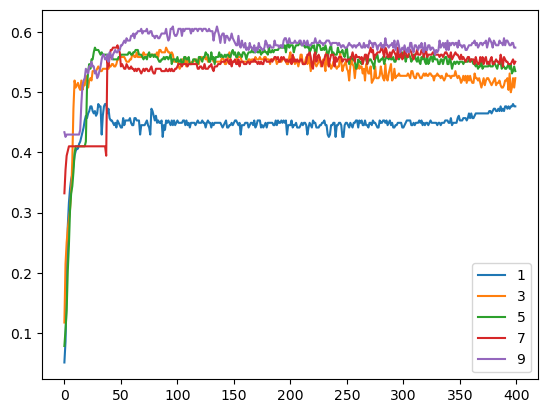

In [84]:
plot_df.plot()

### LDA

In [263]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
# Need to try 3 different component values (after picking, run time and learning curve comparison)
scores = []
index = [2, 3, 4, 5]

for i in index:
    pca = LinearDiscriminantAnalysis(n_components=i).fit(X_train, np.argmax(y_train, axis=-1)) # Check this for leakage
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)
    cv_score = clf.fit(pca_X_train, y_train, validation_split=.2)
    scores.append(cv_score)

Epoch 1/400


C:\Users\legen\AppData\Local\Temp\ipykernel_22308\332601546.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.8013 - accuracy: 0.1144 - val_loss: 1.7963 - val_accuracy: 0.2344
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7895 - accuracy: 0.2581 - val_loss: 1.7833 - val_accuracy: 0.3516
Epoch 3/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7782 - accuracy: 0.3685 - val_loss: 1.7701 - val_accuracy: 0.4180
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7663 - accuracy: 0.4076 - val_loss: 1.7564 - val_accuracy: 0.4219
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7534 - accuracy: 0.4184 - val_loss: 1.7418 - val_accuracy: 0.4258
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7394 - accuracy: 0.4203 - val_loss: 1.7263 - val_accuracy: 0.4297
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7246 - accuracy: 0.4203 - val_loss: 1.7093 - val_accuracy: 0.4297
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.9275 - accuracy: 0.6051 - val_loss: 0.9497 - val_accuracy: 0.5898
Epoch 118/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9274 - accuracy: 0.6051 - val_loss: 0.9486 - val_accuracy: 0.5898
Epoch 119/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9268 - accuracy: 0.6022 - val_loss: 0.9498 - val_accuracy: 0.5742
Epoch 120/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9270 - accuracy: 0.6022 - val_loss: 0.9507 - val_accuracy: 0.5664
Epoch 121/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9262 - accuracy: 0.6031 - val_loss: 0.9492 - val_accuracy: 0.5742
Epoch 122/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9260 - accuracy: 0.6051 - val_loss: 0.9472 - val_accuracy: 0.5898
Epoch 123/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9255 - accuracy: 0.6061 - val_loss: 0.9468 - val_accuracy: 0.5859
Epoch 124/400
4/4 [========

Epoch 233/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9087 - accuracy: 0.6149 - val_loss: 0.9314 - val_accuracy: 0.5742
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9089 - accuracy: 0.6149 - val_loss: 0.9312 - val_accuracy: 0.5742
Epoch 235/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9085 - accuracy: 0.6109 - val_loss: 0.9315 - val_accuracy: 0.5703
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9086 - accuracy: 0.6109 - val_loss: 0.9321 - val_accuracy: 0.5625
Epoch 237/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9084 - accuracy: 0.6100 - val_loss: 0.9324 - val_accuracy: 0.5586
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9083 - accuracy: 0.6139 - val_loss: 0.9316 - val_accuracy: 0.5742
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9081 - accuracy: 0.6168 - val_loss: 0.9316 - val_accuracy: 0.5703
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9047 - accuracy: 0.6109 - val_loss: 0.9326 - val_accuracy: 0.5625
Epoch 292/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9048 - accuracy: 0.6080 - val_loss: 0.9321 - val_accuracy: 0.5625
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9049 - accuracy: 0.6070 - val_loss: 0.9322 - val_accuracy: 0.5586
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9046 - accuracy: 0.6119 - val_loss: 0.9326 - val_accuracy: 0.5625
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9044 - accuracy: 0.6109 - val_loss: 0.9330 - val_accuracy: 0.5703
Epoch 296/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9045 - accuracy: 0.6100 - val_loss: 0.9330 - val_accuracy: 0.5742
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9051 - accuracy: 0.6051 - val_loss: 0.9336 - val_accuracy: 0.5664
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9018 - accuracy: 0.6178 - val_loss: 0.9309 - val_accuracy: 0.5664
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9016 - accuracy: 0.6149 - val_loss: 0.9320 - val_accuracy: 0.5664
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9023 - accuracy: 0.6090 - val_loss: 0.9331 - val_accuracy: 0.5625
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9018 - accuracy: 0.6109 - val_loss: 0.9331 - val_accuracy: 0.5625
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9017 - accuracy: 0.6119 - val_loss: 0.9323 - val_accuracy: 0.5703
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9018 - accuracy: 0.6129 - val_loss: 0.9324 - val_accuracy: 0.5625
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9016 - accuracy: 0.6149 - val_loss: 0.9309 - val_accuracy: 0.5703
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\332601546.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 34ms/step - loss: 1.7874 - accuracy: 0.4086 - val_loss: 1.7763 - val_accuracy: 0.4258
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7645 - accuracy: 0.4194 - val_loss: 1.7513 - val_accuracy: 0.4297
Epoch 3/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7423 - accuracy: 0.4194 - val_loss: 1.7269 - val_accuracy: 0.4297
Epoch 4/400
4/4 [==============================] - 0s 8ms/step - loss: 1.7202 - accuracy: 0.4194 - val_loss: 1.7019 - val_accuracy: 0.4297
Epoch 5/400
4/4 [==============================] - 0s 8ms/step - loss: 1.6968 - accuracy: 0.4194 - val_loss: 1.6766 - val_accuracy: 0.4297
Epoch 6/400
4/4 [==============================] - 0s 8ms/step - loss: 1.6734 - accuracy: 0.4194 - val_loss: 1.6496 - val_accuracy: 0.4297
Epoch 7/400
4/4 [==============================] - 0s 8ms/step - loss: 1.6485 - accuracy: 0.4194 - val_loss: 1.6218 - val_accuracy: 0.4297
Epoch 8/400
4/4 [=====================

4/4 [==============================] - 0s 8ms/step - loss: 0.9026 - accuracy: 0.6197 - val_loss: 0.9561 - val_accuracy: 0.5703
Epoch 118/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9026 - accuracy: 0.6217 - val_loss: 0.9561 - val_accuracy: 0.5742
Epoch 119/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9023 - accuracy: 0.6188 - val_loss: 0.9572 - val_accuracy: 0.5664
Epoch 120/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9017 - accuracy: 0.6197 - val_loss: 0.9575 - val_accuracy: 0.5625
Epoch 121/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9023 - accuracy: 0.6237 - val_loss: 0.9572 - val_accuracy: 0.5664
Epoch 122/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9016 - accuracy: 0.6168 - val_loss: 0.9532 - val_accuracy: 0.5742
Epoch 123/400
4/4 [==============================] - 0s 8ms/step - loss: 0.9016 - accuracy: 0.6197 - val_loss: 0.9531 - val_accuracy: 0.5820
Epoch 124/400
4/4 [========

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8793 - accuracy: 0.6256 - val_loss: 0.9421 - val_accuracy: 0.5742
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8790 - accuracy: 0.6266 - val_loss: 0.9404 - val_accuracy: 0.5820
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8787 - accuracy: 0.6256 - val_loss: 0.9403 - val_accuracy: 0.5820
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8785 - accuracy: 0.6276 - val_loss: 0.9407 - val_accuracy: 0.5820
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8786 - accuracy: 0.6276 - val_loss: 0.9399 - val_accuracy: 0.5859
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8785 - accuracy: 0.6276 - val_loss: 0.9404 - val_accuracy: 0.5781
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8781 - accuracy: 0.6276 - val_loss: 0.9403 - val_accuracy: 0.5820
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8690 - accuracy: 0.6305 - val_loss: 0.9393 - val_accuracy: 0.5781
Epoch 292/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8690 - accuracy: 0.6266 - val_loss: 0.9395 - val_accuracy: 0.5781
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8693 - accuracy: 0.6295 - val_loss: 0.9387 - val_accuracy: 0.5703
Epoch 294/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8688 - accuracy: 0.6315 - val_loss: 0.9391 - val_accuracy: 0.5820
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8687 - accuracy: 0.6217 - val_loss: 0.9398 - val_accuracy: 0.5898
Epoch 296/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8685 - accuracy: 0.6276 - val_loss: 0.9395 - val_accuracy: 0.5742
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8683 - accuracy: 0.6305 - val_loss: 0.9388 - val_accuracy: 0.5703
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8586 - accuracy: 0.6373 - val_loss: 0.9391 - val_accuracy: 0.5625
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8579 - accuracy: 0.6344 - val_loss: 0.9373 - val_accuracy: 0.5586
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8579 - accuracy: 0.6471 - val_loss: 0.9366 - val_accuracy: 0.5664
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8569 - accuracy: 0.6393 - val_loss: 0.9392 - val_accuracy: 0.5625
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8574 - accuracy: 0.6393 - val_loss: 0.9361 - val_accuracy: 0.5781
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8565 - accuracy: 0.6354 - val_loss: 0.9364 - val_accuracy: 0.5742
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8560 - accuracy: 0.6393 - val_loss: 0.9363 - val_accuracy: 0.5703
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\332601546.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.7801 - accuracy: 0.3001 - val_loss: 1.7669 - val_accuracy: 0.3398
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7634 - accuracy: 0.4037 - val_loss: 1.7479 - val_accuracy: 0.4180
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7448 - accuracy: 0.4291 - val_loss: 1.7269 - val_accuracy: 0.4453
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7240 - accuracy: 0.4311 - val_loss: 1.7047 - val_accuracy: 0.4688
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7014 - accuracy: 0.4321 - val_loss: 1.6815 - val_accuracy: 0.4570
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.6768 - accuracy: 0.4321 - val_loss: 1.6569 - val_accuracy: 0.4609
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6516 - accuracy: 0.4350 - val_loss: 1.6315 - val_accuracy: 0.4492
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 0.9119 - accuracy: 0.6158 - val_loss: 0.9580 - val_accuracy: 0.5898
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9111 - accuracy: 0.6207 - val_loss: 0.9591 - val_accuracy: 0.5859
Epoch 119/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9105 - accuracy: 0.6197 - val_loss: 0.9596 - val_accuracy: 0.5820
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9105 - accuracy: 0.6178 - val_loss: 0.9594 - val_accuracy: 0.5781
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9099 - accuracy: 0.6168 - val_loss: 0.9578 - val_accuracy: 0.5898
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9095 - accuracy: 0.6149 - val_loss: 0.9586 - val_accuracy: 0.5859
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9091 - accuracy: 0.6158 - val_loss: 0.9582 - val_accuracy: 0.5859
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8924 - accuracy: 0.6276 - val_loss: 0.9469 - val_accuracy: 0.5938
Epoch 176/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8921 - accuracy: 0.6295 - val_loss: 0.9471 - val_accuracy: 0.5938
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8920 - accuracy: 0.6295 - val_loss: 0.9474 - val_accuracy: 0.5938
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8917 - accuracy: 0.6295 - val_loss: 0.9469 - val_accuracy: 0.6016
Epoch 179/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8920 - accuracy: 0.6266 - val_loss: 0.9490 - val_accuracy: 0.5820
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8911 - accuracy: 0.6285 - val_loss: 0.9466 - val_accuracy: 0.6016
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8911 - accuracy: 0.6285 - val_loss: 0.9464 - val_accuracy: 0.5938
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8801 - accuracy: 0.6256 - val_loss: 0.9423 - val_accuracy: 0.5742
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8791 - accuracy: 0.6246 - val_loss: 0.9375 - val_accuracy: 0.5781
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8790 - accuracy: 0.6256 - val_loss: 0.9373 - val_accuracy: 0.5898
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8782 - accuracy: 0.6256 - val_loss: 0.9405 - val_accuracy: 0.5859
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8782 - accuracy: 0.6256 - val_loss: 0.9420 - val_accuracy: 0.5820
Epoch 238/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8780 - accuracy: 0.6237 - val_loss: 0.9388 - val_accuracy: 0.5859
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8775 - accuracy: 0.6276 - val_loss: 0.9380 - val_accuracy: 0.5859
Epoch 24

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8675 - accuracy: 0.6276 - val_loss: 0.9372 - val_accuracy: 0.5781
Epoch 292/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8674 - accuracy: 0.6256 - val_loss: 0.9372 - val_accuracy: 0.5820
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8670 - accuracy: 0.6266 - val_loss: 0.9367 - val_accuracy: 0.5820
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8675 - accuracy: 0.6197 - val_loss: 0.9389 - val_accuracy: 0.5742
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8667 - accuracy: 0.6207 - val_loss: 0.9358 - val_accuracy: 0.5781
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8664 - accuracy: 0.6256 - val_loss: 0.9360 - val_accuracy: 0.5820
Epoch 297/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8665 - accuracy: 0.6266 - val_loss: 0.9362 - val_accuracy: 0.5820
Epoch 29

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8562 - accuracy: 0.6266 - val_loss: 0.9356 - val_accuracy: 0.5703
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8572 - accuracy: 0.6276 - val_loss: 0.9341 - val_accuracy: 0.5859
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8558 - accuracy: 0.6256 - val_loss: 0.9358 - val_accuracy: 0.5703
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8555 - accuracy: 0.6295 - val_loss: 0.9377 - val_accuracy: 0.5703
Epoch 353/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8562 - accuracy: 0.6276 - val_loss: 0.9371 - val_accuracy: 0.5742
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8552 - accuracy: 0.6256 - val_loss: 0.9345 - val_accuracy: 0.5742
Epoch 355/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8553 - accuracy: 0.6237 - val_loss: 0.9359 - val_accuracy: 0.5859
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\332601546.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.7495 - accuracy: 0.1838 - val_loss: 1.7309 - val_accuracy: 0.2188
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7249 - accuracy: 0.3128 - val_loss: 1.7071 - val_accuracy: 0.3281
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7002 - accuracy: 0.3959 - val_loss: 1.6827 - val_accuracy: 0.3672
Epoch 4/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6756 - accuracy: 0.3988 - val_loss: 1.6589 - val_accuracy: 0.3945
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6509 - accuracy: 0.3978 - val_loss: 1.6344 - val_accuracy: 0.4062
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6261 - accuracy: 0.3998 - val_loss: 1.6089 - val_accuracy: 0.4102
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6000 - accuracy: 0.4008 - val_loss: 1.5835 - val_accuracy: 0.4102
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 10ms/step - loss: 0.8967 - accuracy: 0.6227 - val_loss: 1.0029 - val_accuracy: 0.5547
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8952 - accuracy: 0.6246 - val_loss: 1.0026 - val_accuracy: 0.5469
Epoch 119/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8945 - accuracy: 0.6256 - val_loss: 1.0023 - val_accuracy: 0.5508
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8943 - accuracy: 0.6227 - val_loss: 1.0009 - val_accuracy: 0.5547
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8936 - accuracy: 0.6227 - val_loss: 1.0005 - val_accuracy: 0.5586
Epoch 122/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8930 - accuracy: 0.6256 - val_loss: 1.0007 - val_accuracy: 0.5547
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8923 - accuracy: 0.6227 - val_loss: 1.0006 - val_accuracy: 0.5508
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8708 - accuracy: 0.6295 - val_loss: 0.9936 - val_accuracy: 0.5508
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8711 - accuracy: 0.6285 - val_loss: 0.9937 - val_accuracy: 0.5508
Epoch 177/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8705 - accuracy: 0.6305 - val_loss: 0.9941 - val_accuracy: 0.5391
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8701 - accuracy: 0.6266 - val_loss: 0.9939 - val_accuracy: 0.5469
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8696 - accuracy: 0.6285 - val_loss: 0.9936 - val_accuracy: 0.5469
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8693 - accuracy: 0.6285 - val_loss: 0.9934 - val_accuracy: 0.5430
Epoch 181/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8689 - accuracy: 0.6266 - val_loss: 0.9933 - val_accuracy: 0.5508
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8541 - accuracy: 0.6325 - val_loss: 0.9863 - val_accuracy: 0.5508
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8540 - accuracy: 0.6325 - val_loss: 0.9861 - val_accuracy: 0.5547
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8535 - accuracy: 0.6334 - val_loss: 0.9870 - val_accuracy: 0.5586
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8534 - accuracy: 0.6315 - val_loss: 0.9875 - val_accuracy: 0.5586
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8538 - accuracy: 0.6305 - val_loss: 0.9873 - val_accuracy: 0.5625
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8529 - accuracy: 0.6325 - val_loss: 0.9877 - val_accuracy: 0.5508
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8530 - accuracy: 0.6334 - val_loss: 0.9880 - val_accuracy: 0.5469
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8424 - accuracy: 0.6364 - val_loss: 0.9900 - val_accuracy: 0.5508
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8418 - accuracy: 0.6393 - val_loss: 0.9918 - val_accuracy: 0.5469
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8418 - accuracy: 0.6422 - val_loss: 0.9920 - val_accuracy: 0.5586
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8411 - accuracy: 0.6452 - val_loss: 0.9892 - val_accuracy: 0.5586
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8417 - accuracy: 0.6413 - val_loss: 0.9897 - val_accuracy: 0.5586
Epoch 296/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8409 - accuracy: 0.6442 - val_loss: 0.9897 - val_accuracy: 0.5547
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8406 - accuracy: 0.6413 - val_loss: 0.9899 - val_accuracy: 0.5508
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8307 - accuracy: 0.6422 - val_loss: 0.9927 - val_accuracy: 0.5586
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8300 - accuracy: 0.6452 - val_loss: 0.9926 - val_accuracy: 0.5586
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8297 - accuracy: 0.6432 - val_loss: 0.9943 - val_accuracy: 0.5625
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8295 - accuracy: 0.6471 - val_loss: 0.9936 - val_accuracy: 0.5664
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8292 - accuracy: 0.6481 - val_loss: 0.9936 - val_accuracy: 0.5664
Epoch 354/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8291 - accuracy: 0.6452 - val_loss: 0.9941 - val_accuracy: 0.5625
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8293 - accuracy: 0.6471 - val_loss: 0.9920 - val_accuracy: 0.5625
Epoch 

In [96]:
data = [x.history['val_accuracy'] for x in scores]

In [97]:
plot_df = pd.DataFrame(data=data, index=index).T

<AxesSubplot:>

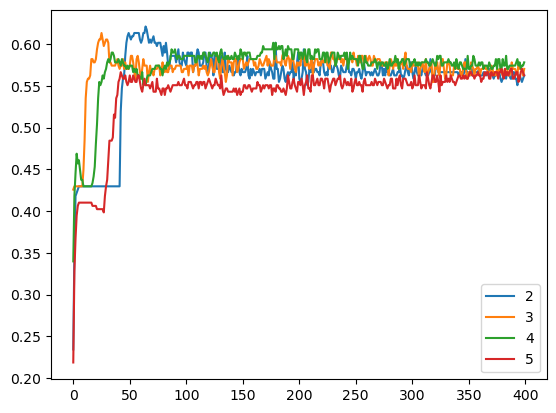

In [98]:
plot_df.plot()

#### Loss Curves (One for Training, one for validation loss. They will all be on the same chart)
Make sure to argue which one is better

In [361]:
times = {}
clf1 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=X_train.shape)
start = time.time()
normal_res = clf1.fit(X_train, y_train, validation_split=.2)
times['normal'] = time.time() - start

pca = PCA(n_components=7).fit(X_train)
pca_X_train = pca.transform(X_train)
clf2 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)
start = time.time()
pca_res = clf2.fit(pca_X_train, y_train, validation_split=.2)
times['pca'] = time.time() - start


ica = FastICA(n_components=8).fit(X_train)
ica_X_train = ica.transform(X_train)
clf3 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=ica_X_train.shape)
start = time.time()
ica_res = clf3.fit(ica_X_train, y_train, validation_split=.2)
times['ica'] = time.time() - start


rp = GaussianRandomProjection(n_components=10).fit(X_train)
rp_X_train = rp.transform(X_train)
clf4 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=rp_X_train.shape)
start = time.time()
rp_res = clf4.fit(rp_X_train, y_train, validation_split=.2)
times['rp'] = time.time() - start


lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train, np.argmax(y_train, axis=-1))
lda_X_train = lda.transform(X_train)
clf5 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=lda_X_train.shape)
start = time.time()
lda_res = clf5.fit(lda_X_train, y_train, validation_split=.2)
times['lda'] = time.time() - start


Epoch 1/400


C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3419268593.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf1 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=X_train.shape)


4/4 [==============================] - 0s 41ms/step - loss: 1.7761 - accuracy: 0.3978 - val_loss: 1.7659 - val_accuracy: 0.3984
Epoch 2/400
4/4 [==============================] - 0s 24ms/step - loss: 1.7569 - accuracy: 0.4106 - val_loss: 1.7469 - val_accuracy: 0.4023
Epoch 3/400
4/4 [==============================] - 0s 21ms/step - loss: 1.7378 - accuracy: 0.4115 - val_loss: 1.7275 - val_accuracy: 0.4023
Epoch 4/400
4/4 [==============================] - 0s 18ms/step - loss: 1.7184 - accuracy: 0.4115 - val_loss: 1.7072 - val_accuracy: 0.4023
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 1.6979 - accuracy: 0.4115 - val_loss: 1.6853 - val_accuracy: 0.4023
Epoch 6/400
4/4 [==============================] - 0s 17ms/step - loss: 1.6756 - accuracy: 0.4115 - val_loss: 1.6618 - val_accuracy: 0.4023
Epoch 7/400
4/4 [==============================] - 0s 17ms/step - loss: 1.6510 - accuracy: 0.4115 - val_loss: 1.6357 - val_accuracy: 0.4023
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 0.9709 - accuracy: 0.5973 - val_loss: 0.9901 - val_accuracy: 0.5703
Epoch 60/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9694 - accuracy: 0.6002 - val_loss: 0.9890 - val_accuracy: 0.5703
Epoch 61/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9680 - accuracy: 0.6022 - val_loss: 0.9884 - val_accuracy: 0.5703
Epoch 62/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9662 - accuracy: 0.6002 - val_loss: 0.9878 - val_accuracy: 0.5703
Epoch 63/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9647 - accuracy: 0.5992 - val_loss: 0.9874 - val_accuracy: 0.5703
Epoch 64/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9632 - accuracy: 0.5953 - val_loss: 0.9863 - val_accuracy: 0.5664
Epoch 65/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9622 - accuracy: 0.5973 - val_loss: 0.9856 - val_accuracy: 0.5703
Epoch 66/400
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.9132 - accuracy: 0.6158 - val_loss: 0.9619 - val_accuracy: 0.6094
Epoch 118/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9124 - accuracy: 0.6197 - val_loss: 0.9614 - val_accuracy: 0.6094
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9120 - accuracy: 0.6197 - val_loss: 0.9606 - val_accuracy: 0.6094
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9110 - accuracy: 0.6207 - val_loss: 0.9607 - val_accuracy: 0.6094
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9104 - accuracy: 0.6207 - val_loss: 0.9606 - val_accuracy: 0.6055
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9099 - accuracy: 0.6188 - val_loss: 0.9605 - val_accuracy: 0.6016
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9092 - accuracy: 0.6207 - val_loss: 0.9604 - val_accuracy: 0.6094
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8759 - accuracy: 0.6237 - val_loss: 0.9459 - val_accuracy: 0.6250
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8754 - accuracy: 0.6266 - val_loss: 0.9468 - val_accuracy: 0.6289
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8749 - accuracy: 0.6276 - val_loss: 0.9462 - val_accuracy: 0.6289
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8741 - accuracy: 0.6197 - val_loss: 0.9464 - val_accuracy: 0.6289
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8736 - accuracy: 0.6217 - val_loss: 0.9461 - val_accuracy: 0.6289
Epoch 180/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8729 - accuracy: 0.6217 - val_loss: 0.9457 - val_accuracy: 0.6289
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8723 - accuracy: 0.6227 - val_loss: 0.9453 - val_accuracy: 0.6289
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8427 - accuracy: 0.6549 - val_loss: 0.9437 - val_accuracy: 0.6289
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8417 - accuracy: 0.6471 - val_loss: 0.9439 - val_accuracy: 0.6250
Epoch 235/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8412 - accuracy: 0.6510 - val_loss: 0.9438 - val_accuracy: 0.6250
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8410 - accuracy: 0.6510 - val_loss: 0.9441 - val_accuracy: 0.6250
Epoch 237/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8404 - accuracy: 0.6520 - val_loss: 0.9446 - val_accuracy: 0.6250
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8397 - accuracy: 0.6530 - val_loss: 0.9447 - val_accuracy: 0.6250
Epoch 239/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8394 - accuracy: 0.6530 - val_loss: 0.9437 - val_accuracy: 0.6250
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8111 - accuracy: 0.6608 - val_loss: 0.9501 - val_accuracy: 0.6250
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8114 - accuracy: 0.6628 - val_loss: 0.9515 - val_accuracy: 0.6211
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8106 - accuracy: 0.6579 - val_loss: 0.9517 - val_accuracy: 0.6133
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8109 - accuracy: 0.6598 - val_loss: 0.9511 - val_accuracy: 0.6172
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8094 - accuracy: 0.6647 - val_loss: 0.9507 - val_accuracy: 0.6172
Epoch 296/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8103 - accuracy: 0.6667 - val_loss: 0.9520 - val_accuracy: 0.6250
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8084 - accuracy: 0.6628 - val_loss: 0.9516 - val_accuracy: 0.6172
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7836 - accuracy: 0.6725 - val_loss: 0.9593 - val_accuracy: 0.6133
Epoch 350/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7834 - accuracy: 0.6735 - val_loss: 0.9596 - val_accuracy: 0.6016
Epoch 351/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7827 - accuracy: 0.6784 - val_loss: 0.9597 - val_accuracy: 0.6133
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7820 - accuracy: 0.6794 - val_loss: 0.9588 - val_accuracy: 0.6094
Epoch 353/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7814 - accuracy: 0.6784 - val_loss: 0.9590 - val_accuracy: 0.6133
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7805 - accuracy: 0.6774 - val_loss: 0.9602 - val_accuracy: 0.6094
Epoch 355/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7803 - accuracy: 0.6823 - val_loss: 0.9605 - val_accuracy: 0.6016
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3419268593.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf2 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=pca_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7978 - accuracy: 0.2620 - val_loss: 1.7870 - val_accuracy: 0.3711
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7821 - accuracy: 0.3910 - val_loss: 1.7721 - val_accuracy: 0.4023
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7674 - accuracy: 0.4096 - val_loss: 1.7579 - val_accuracy: 0.4023
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7523 - accuracy: 0.4115 - val_loss: 1.7430 - val_accuracy: 0.4023
Epoch 5/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7360 - accuracy: 0.4115 - val_loss: 1.7273 - val_accuracy: 0.4023
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7188 - accuracy: 0.4115 - val_loss: 1.7104 - val_accuracy: 0.4023
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7012 - accuracy: 0.4115 - val_loss: 1.6930 - val_accuracy: 0.4023
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 1.0093 - accuracy: 0.5904 - val_loss: 0.9960 - val_accuracy: 0.5977
Epoch 60/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0077 - accuracy: 0.5875 - val_loss: 0.9943 - val_accuracy: 0.5977
Epoch 61/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0059 - accuracy: 0.5914 - val_loss: 0.9927 - val_accuracy: 0.5938
Epoch 62/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0041 - accuracy: 0.5924 - val_loss: 0.9913 - val_accuracy: 0.5977
Epoch 63/400
4/4 [==============================] - 0s 12ms/step - loss: 1.0024 - accuracy: 0.5914 - val_loss: 0.9900 - val_accuracy: 0.6016
Epoch 64/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0009 - accuracy: 0.5875 - val_loss: 0.9887 - val_accuracy: 0.6055
Epoch 65/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9995 - accuracy: 0.5924 - val_loss: 0.9875 - val_accuracy: 0.5938
Epoch 66/400
4/4 [==========

4/4 [==============================] - 0s 9ms/step - loss: 0.9552 - accuracy: 0.5943 - val_loss: 0.9582 - val_accuracy: 0.5859
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9546 - accuracy: 0.5963 - val_loss: 0.9575 - val_accuracy: 0.5898
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9541 - accuracy: 0.5924 - val_loss: 0.9571 - val_accuracy: 0.5898
Epoch 120/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9538 - accuracy: 0.5943 - val_loss: 0.9569 - val_accuracy: 0.5859
Epoch 121/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9530 - accuracy: 0.5973 - val_loss: 0.9570 - val_accuracy: 0.5938
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9528 - accuracy: 0.5982 - val_loss: 0.9567 - val_accuracy: 0.5898
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9522 - accuracy: 0.5982 - val_loss: 0.9563 - val_accuracy: 0.5898
Epoch 124/400
4/4 [===

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9258 - accuracy: 0.6246 - val_loss: 0.9540 - val_accuracy: 0.5781
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9256 - accuracy: 0.6227 - val_loss: 0.9544 - val_accuracy: 0.5781
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9253 - accuracy: 0.6217 - val_loss: 0.9546 - val_accuracy: 0.5781
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9247 - accuracy: 0.6197 - val_loss: 0.9538 - val_accuracy: 0.5781
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9243 - accuracy: 0.6197 - val_loss: 0.9534 - val_accuracy: 0.5820
Epoch 180/400
4/4 [==============================] - 0s 14ms/step - loss: 0.9240 - accuracy: 0.6207 - val_loss: 0.9536 - val_accuracy: 0.5781
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9239 - accuracy: 0.6197 - val_loss: 0.9536 - val_accuracy: 0.5820
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9064 - accuracy: 0.6325 - val_loss: 0.9576 - val_accuracy: 0.5859
Epoch 234/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9069 - accuracy: 0.6344 - val_loss: 0.9568 - val_accuracy: 0.5859
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9060 - accuracy: 0.6354 - val_loss: 0.9592 - val_accuracy: 0.5977
Epoch 236/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9057 - accuracy: 0.6285 - val_loss: 0.9598 - val_accuracy: 0.5977
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9052 - accuracy: 0.6305 - val_loss: 0.9583 - val_accuracy: 0.5938
Epoch 238/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9049 - accuracy: 0.6325 - val_loss: 0.9576 - val_accuracy: 0.5859
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9051 - accuracy: 0.6325 - val_loss: 0.9589 - val_accuracy: 0.5938
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8895 - accuracy: 0.6461 - val_loss: 0.9639 - val_accuracy: 0.5898
Epoch 292/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8893 - accuracy: 0.6461 - val_loss: 0.9617 - val_accuracy: 0.5938
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8891 - accuracy: 0.6461 - val_loss: 0.9634 - val_accuracy: 0.5938
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8888 - accuracy: 0.6461 - val_loss: 0.9627 - val_accuracy: 0.5938
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8883 - accuracy: 0.6452 - val_loss: 0.9652 - val_accuracy: 0.5859
Epoch 296/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8881 - accuracy: 0.6452 - val_loss: 0.9653 - val_accuracy: 0.5938
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8874 - accuracy: 0.6471 - val_loss: 0.9637 - val_accuracy: 0.5977
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8719 - accuracy: 0.6559 - val_loss: 0.9719 - val_accuracy: 0.5820
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8714 - accuracy: 0.6540 - val_loss: 0.9706 - val_accuracy: 0.5820
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8715 - accuracy: 0.6540 - val_loss: 0.9706 - val_accuracy: 0.5781
Epoch 352/400
4/4 [==============================] - 0s 14ms/step - loss: 0.8708 - accuracy: 0.6579 - val_loss: 0.9729 - val_accuracy: 0.5859
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8707 - accuracy: 0.6579 - val_loss: 0.9745 - val_accuracy: 0.5820
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8705 - accuracy: 0.6559 - val_loss: 0.9752 - val_accuracy: 0.5820
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8702 - accuracy: 0.6530 - val_loss: 0.9722 - val_accuracy: 0.5820
Epoch 

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3419268593.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf3 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=ica_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.7898 - accuracy: 0.2815 - val_loss: 1.7852 - val_accuracy: 0.4336
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7837 - accuracy: 0.4096 - val_loss: 1.7788 - val_accuracy: 0.4375
Epoch 3/400
4/4 [==============================] - 0s 9ms/step - loss: 1.7776 - accuracy: 0.4096 - val_loss: 1.7721 - val_accuracy: 0.4375
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7710 - accuracy: 0.4096 - val_loss: 1.7645 - val_accuracy: 0.4375
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7634 - accuracy: 0.4125 - val_loss: 1.7558 - val_accuracy: 0.4375
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7552 - accuracy: 0.4096 - val_loss: 1.7464 - val_accuracy: 0.4375
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7459 - accuracy: 0.4096 - val_loss: 1.7362 - val_accuracy: 0.4375
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 12ms/step - loss: 1.0083 - accuracy: 0.5797 - val_loss: 0.9741 - val_accuracy: 0.6016
Epoch 60/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0073 - accuracy: 0.5816 - val_loss: 0.9712 - val_accuracy: 0.5977
Epoch 61/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0055 - accuracy: 0.5836 - val_loss: 0.9694 - val_accuracy: 0.6055
Epoch 62/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0040 - accuracy: 0.5797 - val_loss: 0.9683 - val_accuracy: 0.6016
Epoch 63/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0028 - accuracy: 0.5875 - val_loss: 0.9690 - val_accuracy: 0.6016
Epoch 64/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0008 - accuracy: 0.5846 - val_loss: 0.9664 - val_accuracy: 0.6055
Epoch 65/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0005 - accuracy: 0.5758 - val_loss: 0.9652 - val_accuracy: 0.5898
Epoch 66/400
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.9793 - accuracy: 0.5885 - val_loss: 0.9447 - val_accuracy: 0.6016
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9780 - accuracy: 0.5963 - val_loss: 0.9459 - val_accuracy: 0.6211
Epoch 119/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9784 - accuracy: 0.5914 - val_loss: 0.9441 - val_accuracy: 0.5977
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9765 - accuracy: 0.5992 - val_loss: 0.9443 - val_accuracy: 0.5938
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9773 - accuracy: 0.5963 - val_loss: 0.9438 - val_accuracy: 0.5977
Epoch 122/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9763 - accuracy: 0.6002 - val_loss: 0.9453 - val_accuracy: 0.6211
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9774 - accuracy: 0.5982 - val_loss: 0.9434 - val_accuracy: 0.5977
Epoch 124/400
4/4 [===

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9669 - accuracy: 0.6012 - val_loss: 0.9336 - val_accuracy: 0.6016
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9684 - accuracy: 0.5943 - val_loss: 0.9334 - val_accuracy: 0.6016
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9663 - accuracy: 0.5973 - val_loss: 0.9342 - val_accuracy: 0.6016
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9684 - accuracy: 0.5943 - val_loss: 0.9336 - val_accuracy: 0.6016
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9662 - accuracy: 0.5992 - val_loss: 0.9337 - val_accuracy: 0.6055
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9672 - accuracy: 0.5963 - val_loss: 0.9330 - val_accuracy: 0.6055
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9683 - accuracy: 0.6002 - val_loss: 0.9332 - val_accuracy: 0.6016
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9592 - accuracy: 0.5982 - val_loss: 0.9241 - val_accuracy: 0.6016
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9602 - accuracy: 0.6002 - val_loss: 0.9245 - val_accuracy: 0.6016
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9598 - accuracy: 0.5953 - val_loss: 0.9250 - val_accuracy: 0.6094
Epoch 236/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9592 - accuracy: 0.5934 - val_loss: 0.9239 - val_accuracy: 0.6016
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9587 - accuracy: 0.6041 - val_loss: 0.9236 - val_accuracy: 0.6016
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9585 - accuracy: 0.6041 - val_loss: 0.9233 - val_accuracy: 0.6016
Epoch 239/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9615 - accuracy: 0.5943 - val_loss: 0.9248 - val_accuracy: 0.6094
Epoch 240

Epoch 291/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9485 - accuracy: 0.5963 - val_loss: 0.9088 - val_accuracy: 0.6133
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9484 - accuracy: 0.5963 - val_loss: 0.9091 - val_accuracy: 0.6172
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9469 - accuracy: 0.6002 - val_loss: 0.9093 - val_accuracy: 0.6055
Epoch 294/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9480 - accuracy: 0.5982 - val_loss: 0.9075 - val_accuracy: 0.6172
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9504 - accuracy: 0.5953 - val_loss: 0.9086 - val_accuracy: 0.6133
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9466 - accuracy: 0.5953 - val_loss: 0.9080 - val_accuracy: 0.6094
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9494 - accuracy: 0.5982 - val_loss: 0.9085 - val_accuracy: 0.6055
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9340 - accuracy: 0.6012 - val_loss: 0.8912 - val_accuracy: 0.6250
Epoch 350/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9328 - accuracy: 0.6002 - val_loss: 0.8911 - val_accuracy: 0.6133
Epoch 351/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9331 - accuracy: 0.6002 - val_loss: 0.8910 - val_accuracy: 0.6172
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9324 - accuracy: 0.6031 - val_loss: 0.8906 - val_accuracy: 0.6250
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9326 - accuracy: 0.6031 - val_loss: 0.8901 - val_accuracy: 0.6211
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9330 - accuracy: 0.6022 - val_loss: 0.8898 - val_accuracy: 0.6172
Epoch 355/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9316 - accuracy: 0.6041 - val_loss: 0.8895 - val_accuracy: 0.6172
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3419268593.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf4 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=rp_X_train.shape)


4/4 [==============================] - 0s 35ms/step - loss: 1.7343 - accuracy: 0.3705 - val_loss: 1.7198 - val_accuracy: 0.3359
Epoch 2/400
4/4 [==============================] - 0s 9ms/step - loss: 1.7122 - accuracy: 0.3773 - val_loss: 1.6972 - val_accuracy: 0.3438
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6880 - accuracy: 0.3744 - val_loss: 1.6721 - val_accuracy: 0.3477
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6618 - accuracy: 0.3851 - val_loss: 1.6444 - val_accuracy: 0.3750
Epoch 5/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6328 - accuracy: 0.3822 - val_loss: 1.6142 - val_accuracy: 0.3711
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6017 - accuracy: 0.3910 - val_loss: 1.5815 - val_accuracy: 0.3828
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.5685 - accuracy: 0.4066 - val_loss: 1.5466 - val_accuracy: 0.3945
Epoch 8/400
4/4 [=================

4/4 [==============================] - 0s 9ms/step - loss: 1.0215 - accuracy: 0.5670 - val_loss: 1.0159 - val_accuracy: 0.5664
Epoch 60/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0196 - accuracy: 0.5670 - val_loss: 1.0148 - val_accuracy: 0.5625
Epoch 61/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0177 - accuracy: 0.5650 - val_loss: 1.0139 - val_accuracy: 0.5664
Epoch 62/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0159 - accuracy: 0.5689 - val_loss: 1.0128 - val_accuracy: 0.5664
Epoch 63/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0141 - accuracy: 0.5670 - val_loss: 1.0120 - val_accuracy: 0.5664
Epoch 64/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0125 - accuracy: 0.5650 - val_loss: 1.0112 - val_accuracy: 0.5625
Epoch 65/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0109 - accuracy: 0.5670 - val_loss: 1.0114 - val_accuracy: 0.5625
Epoch 66/400
4/4 [=============

4/4 [==============================] - 0s 10ms/step - loss: 0.9547 - accuracy: 0.5973 - val_loss: 0.9690 - val_accuracy: 0.5859
Epoch 118/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9527 - accuracy: 0.5934 - val_loss: 0.9671 - val_accuracy: 0.5742
Epoch 119/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9515 - accuracy: 0.5982 - val_loss: 0.9661 - val_accuracy: 0.5820
Epoch 120/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9506 - accuracy: 0.5963 - val_loss: 0.9656 - val_accuracy: 0.5820
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9491 - accuracy: 0.5953 - val_loss: 0.9645 - val_accuracy: 0.5898
Epoch 122/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9483 - accuracy: 0.6002 - val_loss: 0.9643 - val_accuracy: 0.5859
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9474 - accuracy: 0.5953 - val_loss: 0.9636 - val_accuracy: 0.5859
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9001 - accuracy: 0.6188 - val_loss: 0.9438 - val_accuracy: 0.6016
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8993 - accuracy: 0.6207 - val_loss: 0.9451 - val_accuracy: 0.5898
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8980 - accuracy: 0.6246 - val_loss: 0.9450 - val_accuracy: 0.5977
Epoch 178/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8978 - accuracy: 0.6246 - val_loss: 0.9439 - val_accuracy: 0.5977
Epoch 179/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8965 - accuracy: 0.6237 - val_loss: 0.9440 - val_accuracy: 0.5898
Epoch 180/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8962 - accuracy: 0.6227 - val_loss: 0.9447 - val_accuracy: 0.5898
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8958 - accuracy: 0.6237 - val_loss: 0.9458 - val_accuracy: 0.5859
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8585 - accuracy: 0.6461 - val_loss: 0.9568 - val_accuracy: 0.5820
Epoch 234/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8590 - accuracy: 0.6452 - val_loss: 0.9601 - val_accuracy: 0.5820
Epoch 235/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8590 - accuracy: 0.6422 - val_loss: 0.9651 - val_accuracy: 0.5977
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8573 - accuracy: 0.6452 - val_loss: 0.9606 - val_accuracy: 0.5938
Epoch 237/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8561 - accuracy: 0.6579 - val_loss: 0.9638 - val_accuracy: 0.5820
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8561 - accuracy: 0.6500 - val_loss: 0.9630 - val_accuracy: 0.5938
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8543 - accuracy: 0.6510 - val_loss: 0.9626 - val_accuracy: 0.5898
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8270 - accuracy: 0.6618 - val_loss: 0.9666 - val_accuracy: 0.5938
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8265 - accuracy: 0.6579 - val_loss: 0.9644 - val_accuracy: 0.5938
Epoch 293/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8260 - accuracy: 0.6598 - val_loss: 0.9657 - val_accuracy: 0.5938
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8263 - accuracy: 0.6647 - val_loss: 0.9678 - val_accuracy: 0.5938
Epoch 295/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8254 - accuracy: 0.6647 - val_loss: 0.9673 - val_accuracy: 0.5938
Epoch 296/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8253 - accuracy: 0.6598 - val_loss: 0.9658 - val_accuracy: 0.5859
Epoch 297/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8248 - accuracy: 0.6608 - val_loss: 0.9679 - val_accuracy: 0.5977
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8044 - accuracy: 0.6735 - val_loss: 0.9737 - val_accuracy: 0.6055
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8044 - accuracy: 0.6716 - val_loss: 0.9766 - val_accuracy: 0.6016
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8053 - accuracy: 0.6716 - val_loss: 0.9712 - val_accuracy: 0.5977
Epoch 352/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8040 - accuracy: 0.6686 - val_loss: 0.9764 - val_accuracy: 0.6016
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8033 - accuracy: 0.6735 - val_loss: 0.9813 - val_accuracy: 0.6055
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8029 - accuracy: 0.6784 - val_loss: 0.9726 - val_accuracy: 0.6016
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8026 - accuracy: 0.6735 - val_loss: 0.9694 - val_accuracy: 0.6055
Epoch 

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\3419268593.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf5 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=lda_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.7815 - accuracy: 0.0626 - val_loss: 1.7746 - val_accuracy: 0.2031
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7692 - accuracy: 0.2757 - val_loss: 1.7640 - val_accuracy: 0.3828
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7585 - accuracy: 0.3959 - val_loss: 1.7540 - val_accuracy: 0.3984
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7489 - accuracy: 0.4057 - val_loss: 1.7445 - val_accuracy: 0.3984
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7393 - accuracy: 0.4057 - val_loss: 1.7355 - val_accuracy: 0.3984
Epoch 6/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7302 - accuracy: 0.4057 - val_loss: 1.7263 - val_accuracy: 0.3984
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7210 - accuracy: 0.4066 - val_loss: 1.7169 - val_accuracy: 0.3984
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 0.9741 - accuracy: 0.5767 - val_loss: 0.9661 - val_accuracy: 0.6055
Epoch 60/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9730 - accuracy: 0.5787 - val_loss: 0.9654 - val_accuracy: 0.5977
Epoch 61/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9720 - accuracy: 0.5797 - val_loss: 0.9647 - val_accuracy: 0.6055
Epoch 62/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9706 - accuracy: 0.5836 - val_loss: 0.9627 - val_accuracy: 0.6094
Epoch 63/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9700 - accuracy: 0.5836 - val_loss: 0.9608 - val_accuracy: 0.6055
Epoch 64/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9687 - accuracy: 0.5846 - val_loss: 0.9589 - val_accuracy: 0.6094
Epoch 65/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9679 - accuracy: 0.5816 - val_loss: 0.9572 - val_accuracy: 0.6094
Epoch 66/400
4/4 [=========

4/4 [==============================] - 0s 11ms/step - loss: 0.9393 - accuracy: 0.6022 - val_loss: 0.9139 - val_accuracy: 0.6172
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9392 - accuracy: 0.6041 - val_loss: 0.9135 - val_accuracy: 0.6211
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9388 - accuracy: 0.6022 - val_loss: 0.9124 - val_accuracy: 0.6172
Epoch 120/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9384 - accuracy: 0.6002 - val_loss: 0.9122 - val_accuracy: 0.6172
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9382 - accuracy: 0.6002 - val_loss: 0.9119 - val_accuracy: 0.6172
Epoch 122/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9381 - accuracy: 0.6031 - val_loss: 0.9122 - val_accuracy: 0.6172
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9379 - accuracy: 0.6012 - val_loss: 0.9110 - val_accuracy: 0.6172
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9287 - accuracy: 0.6031 - val_loss: 0.8956 - val_accuracy: 0.6172
Epoch 176/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9285 - accuracy: 0.6031 - val_loss: 0.8959 - val_accuracy: 0.6211
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9283 - accuracy: 0.6051 - val_loss: 0.8966 - val_accuracy: 0.6328
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9282 - accuracy: 0.6051 - val_loss: 0.8964 - val_accuracy: 0.6328
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9282 - accuracy: 0.6051 - val_loss: 0.8966 - val_accuracy: 0.6250
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9280 - accuracy: 0.6061 - val_loss: 0.8968 - val_accuracy: 0.6328
Epoch 181/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9278 - accuracy: 0.6070 - val_loss: 0.8957 - val_accuracy: 0.6328
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9232 - accuracy: 0.6061 - val_loss: 0.8898 - val_accuracy: 0.6328
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9232 - accuracy: 0.6051 - val_loss: 0.8892 - val_accuracy: 0.6250
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9233 - accuracy: 0.6022 - val_loss: 0.8896 - val_accuracy: 0.6289
Epoch 236/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9229 - accuracy: 0.6051 - val_loss: 0.8897 - val_accuracy: 0.6289
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9229 - accuracy: 0.6080 - val_loss: 0.8898 - val_accuracy: 0.6328
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9229 - accuracy: 0.6051 - val_loss: 0.8891 - val_accuracy: 0.6250
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9229 - accuracy: 0.6022 - val_loss: 0.8890 - val_accuracy: 0.6250
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9194 - accuracy: 0.6051 - val_loss: 0.8851 - val_accuracy: 0.6289
Epoch 292/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9193 - accuracy: 0.6022 - val_loss: 0.8852 - val_accuracy: 0.6289
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9197 - accuracy: 0.5982 - val_loss: 0.8864 - val_accuracy: 0.6328
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9196 - accuracy: 0.5992 - val_loss: 0.8857 - val_accuracy: 0.6328
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9196 - accuracy: 0.6012 - val_loss: 0.8845 - val_accuracy: 0.6289
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9195 - accuracy: 0.5992 - val_loss: 0.8844 - val_accuracy: 0.6289
Epoch 297/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9189 - accuracy: 0.5992 - val_loss: 0.8845 - val_accuracy: 0.6289
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9171 - accuracy: 0.6012 - val_loss: 0.8834 - val_accuracy: 0.6328
Epoch 350/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9171 - accuracy: 0.6041 - val_loss: 0.8837 - val_accuracy: 0.6328
Epoch 351/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9168 - accuracy: 0.6022 - val_loss: 0.8843 - val_accuracy: 0.6328
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9167 - accuracy: 0.6031 - val_loss: 0.8831 - val_accuracy: 0.6328
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9171 - accuracy: 0.6022 - val_loss: 0.8823 - val_accuracy: 0.6367
Epoch 354/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9165 - accuracy: 0.6041 - val_loss: 0.8833 - val_accuracy: 0.6328
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9167 - accuracy: 0.6022 - val_loss: 0.8842 - val_accuracy: 0.6289
Epoch 3

In [362]:
loss_df = pd.DataFrame(np.array([x.history['loss'] for x in [normal_res, pca_res, ica_res, rp_res, lda_res]]).T, columns=['No DR', 'PCA', 'ICA', 'RP', 'LDA'])

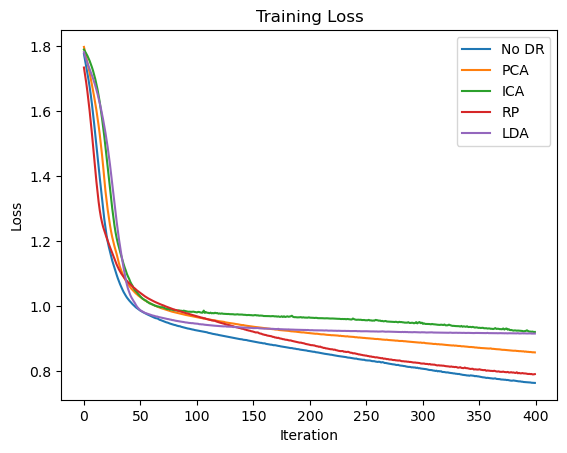

In [363]:
loss_df.plot(title='Training Loss', xlabel='Iteration', ylabel='Loss')
plt.savefig('trainingloss')

In [364]:
loss_df = pd.DataFrame(np.array([x.history['val_loss'] for x in [normal_res, pca_res, ica_res, rp_res, lda_res]]).T, columns=['No DR', 'PCA', 'ICA', 'RP', 'LDA'])

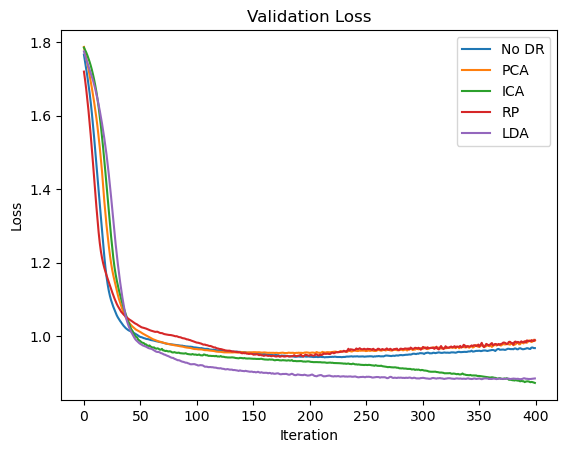

In [365]:
loss_df.plot(title='Validation Loss', xlabel='Iteration', ylabel='Loss')
plt.savefig('validationloss')

In [366]:
print("None: ", clf1.score(X_test, y_test))
print("PCA: ", clf2.score(pca.transform(X_test), y_test))
print("ICA: ", clf3.score(ica.transform(X_test), y_test))
print("RP: ", clf4.score(rp.transform(X_test), y_test))
print("LDA: ", clf5.score(lda.transform(X_test), y_test))

2/2 [==============================] - 0s 3ms/step - loss: 1.1232 - accuracy: 0.5938
None:  0.59375
2/2 [==============================] - 0s 3ms/step - loss: 0.9929 - accuracy: 0.6125
PCA:  0.612500011920929
2/2 [==============================] - 0s 3ms/step - loss: 0.9278 - accuracy: 0.6125
ICA:  0.612500011920929
2/2 [==============================] - 0s 3ms/step - loss: 0.9972 - accuracy: 0.5906
RP:  0.590624988079071
2/2 [==============================] - 0s 5ms/step - loss: 0.9970 - accuracy: 0.6125
LDA:  0.612500011920929


In [367]:
times

{'normal': 16.6906840801239,
 'pca': 16.214113235473633,
 'ica': 16.011669635772705,
 'rp': 16.02798080444336,
 'lda': 16.255518436431885}

## Clustering

### K Means

### Runs
I ran 4 different exps

1. Adding just a low num clusters as features for each training
2. Adding many num cluster allocations as features for each traning
3. Adding just a low num clusters as the only features for training
4. Adding many num cluster allocations as only features for training

In [370]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [371]:
encoded_Y = LabelEncoder().fit_transform(y)

y = to_categorical(encoded_Y)

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [372]:
kmeans = KMeans(n_clusters=10)
em = GaussianMixture(n_components=10)

kmeans.fit(X_train)
em.fit(X_train)

km_X_train = X_train.assign(kmeans=kmeans.predict(X_train))
km_X_test = X_test.assign(kmeans=kmeans.predict(X_test))
em_X_train = X_train.assign(em=em.predict(X_train))
em_X_test = X_test.assign(em=em.predict(X_test))
both_X_train = X_train.assign(kmeans=kmeans.predict(X_train)).assign(em=em.predict(X_train))
both_X_test = X_test.assign(kmeans=kmeans.predict(X_test)).assign(em=em.predict(X_test))


C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\legen\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [373]:
times = {}
clf1 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=X_train.shape)
start = time.time()
normal_res = clf1.fit(X_train, y_train, validation_split=.2)
times['normal'] = time.time() - start


clf2 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=km_X_train.shape)
start = time.time()
kmeans_res = clf2.fit(km_X_train, y_train, validation_split=.2)
times['kmeans'] = time.time() - start

clf3 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=em_X_train.shape)
start = time.time()
em_res = clf3.fit(em_X_train, y_train, validation_split=.2)
times['em'] = time.time() - start

clf4 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=both_X_train.shape)
start = time.time()
both_res = clf4.fit(both_X_train, y_train, validation_split=.2)
times['both'] = time.time() - start

Epoch 1/400


C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2643419239.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf1 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=X_train.shape)


4/4 [==============================] - 0s 42ms/step - loss: 1.7263 - accuracy: 0.3587 - val_loss: 1.6984 - val_accuracy: 0.4570
Epoch 2/400
4/4 [==============================] - 0s 23ms/step - loss: 1.6932 - accuracy: 0.4262 - val_loss: 1.6650 - val_accuracy: 0.4922
Epoch 3/400
4/4 [==============================] - 0s 21ms/step - loss: 1.6592 - accuracy: 0.4692 - val_loss: 1.6314 - val_accuracy: 0.5312
Epoch 4/400
4/4 [==============================] - 0s 14ms/step - loss: 1.6250 - accuracy: 0.4878 - val_loss: 1.5972 - val_accuracy: 0.5273
Epoch 5/400
4/4 [==============================] - 0s 18ms/step - loss: 1.5924 - accuracy: 0.4858 - val_loss: 1.5629 - val_accuracy: 0.5195
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 1.5588 - accuracy: 0.4819 - val_loss: 1.5302 - val_accuracy: 0.5117
Epoch 7/400
4/4 [==============================] - 0s 12ms/step - loss: 1.5285 - accuracy: 0.4809 - val_loss: 1.4992 - val_accuracy: 0.5117
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.9941 - accuracy: 0.5982 - val_loss: 0.9800 - val_accuracy: 0.6172
Epoch 60/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9923 - accuracy: 0.5992 - val_loss: 0.9776 - val_accuracy: 0.6172
Epoch 61/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9902 - accuracy: 0.5992 - val_loss: 0.9763 - val_accuracy: 0.6172
Epoch 62/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9884 - accuracy: 0.5992 - val_loss: 0.9747 - val_accuracy: 0.6211
Epoch 63/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9868 - accuracy: 0.6022 - val_loss: 0.9731 - val_accuracy: 0.6289
Epoch 64/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9847 - accuracy: 0.6051 - val_loss: 0.9711 - val_accuracy: 0.6289
Epoch 65/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9832 - accuracy: 0.6051 - val_loss: 0.9691 - val_accuracy: 0.6328
Epoch 66/400
4/4 [===========

4/4 [==============================] - 0s 11ms/step - loss: 0.9201 - accuracy: 0.6266 - val_loss: 0.9436 - val_accuracy: 0.6445
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9192 - accuracy: 0.6276 - val_loss: 0.9435 - val_accuracy: 0.6367
Epoch 119/400
4/4 [==============================] - 0s 12ms/step - loss: 0.9184 - accuracy: 0.6256 - val_loss: 0.9428 - val_accuracy: 0.6406
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9174 - accuracy: 0.6256 - val_loss: 0.9432 - val_accuracy: 0.6328
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9166 - accuracy: 0.6285 - val_loss: 0.9426 - val_accuracy: 0.6406
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9159 - accuracy: 0.6315 - val_loss: 0.9425 - val_accuracy: 0.6328
Epoch 123/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9151 - accuracy: 0.6315 - val_loss: 0.9420 - val_accuracy: 0.6250
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8758 - accuracy: 0.6530 - val_loss: 0.9245 - val_accuracy: 0.6328
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8747 - accuracy: 0.6500 - val_loss: 0.9245 - val_accuracy: 0.6289
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8738 - accuracy: 0.6520 - val_loss: 0.9253 - val_accuracy: 0.6133
Epoch 178/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8732 - accuracy: 0.6540 - val_loss: 0.9253 - val_accuracy: 0.6172
Epoch 179/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8722 - accuracy: 0.6520 - val_loss: 0.9245 - val_accuracy: 0.6211
Epoch 180/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8717 - accuracy: 0.6530 - val_loss: 0.9241 - val_accuracy: 0.6211
Epoch 181/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8713 - accuracy: 0.6530 - val_loss: 0.9241 - val_accuracy: 0.6211
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8363 - accuracy: 0.6588 - val_loss: 0.9198 - val_accuracy: 0.6367
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8350 - accuracy: 0.6598 - val_loss: 0.9209 - val_accuracy: 0.6289
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8346 - accuracy: 0.6579 - val_loss: 0.9218 - val_accuracy: 0.6289
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8342 - accuracy: 0.6559 - val_loss: 0.9216 - val_accuracy: 0.6289
Epoch 237/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8337 - accuracy: 0.6598 - val_loss: 0.9210 - val_accuracy: 0.6367
Epoch 238/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8329 - accuracy: 0.6598 - val_loss: 0.9215 - val_accuracy: 0.6406
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8324 - accuracy: 0.6618 - val_loss: 0.9209 - val_accuracy: 0.6406
Epoch 240/

Epoch 291/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8020 - accuracy: 0.6784 - val_loss: 0.9290 - val_accuracy: 0.6094
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8020 - accuracy: 0.6774 - val_loss: 0.9315 - val_accuracy: 0.6016
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8004 - accuracy: 0.6774 - val_loss: 0.9300 - val_accuracy: 0.6094
Epoch 294/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8008 - accuracy: 0.6735 - val_loss: 0.9294 - val_accuracy: 0.6055
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7998 - accuracy: 0.6774 - val_loss: 0.9291 - val_accuracy: 0.6133
Epoch 296/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7992 - accuracy: 0.6745 - val_loss: 0.9313 - val_accuracy: 0.6094
Epoch 297/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7983 - accuracy: 0.6823 - val_loss: 0.9315 - val_accuracy: 0.6055
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7725 - accuracy: 0.6911 - val_loss: 0.9507 - val_accuracy: 0.6250
Epoch 350/400
4/4 [==============================] - 0s 12ms/step - loss: 0.7706 - accuracy: 0.6921 - val_loss: 0.9505 - val_accuracy: 0.6250
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7714 - accuracy: 0.6911 - val_loss: 0.9509 - val_accuracy: 0.6211
Epoch 352/400
4/4 [==============================] - 0s 9ms/step - loss: 0.7701 - accuracy: 0.6921 - val_loss: 0.9582 - val_accuracy: 0.6211
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.7703 - accuracy: 0.6862 - val_loss: 0.9547 - val_accuracy: 0.6133
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7694 - accuracy: 0.6931 - val_loss: 0.9518 - val_accuracy: 0.6250
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.7686 - accuracy: 0.6931 - val_loss: 0.9542 - val_accuracy: 0.6211
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2643419239.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf2 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=km_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.8030 - accuracy: 0.1818 - val_loss: 1.7676 - val_accuracy: 0.2578
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7827 - accuracy: 0.2747 - val_loss: 1.7539 - val_accuracy: 0.3867
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7672 - accuracy: 0.3382 - val_loss: 1.7379 - val_accuracy: 0.3984
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7522 - accuracy: 0.3627 - val_loss: 1.7216 - val_accuracy: 0.4062
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7368 - accuracy: 0.3783 - val_loss: 1.7047 - val_accuracy: 0.4102
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7210 - accuracy: 0.3861 - val_loss: 1.6863 - val_accuracy: 0.4180
Epoch 7/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7051 - accuracy: 0.3920 - val_loss: 1.6663 - val_accuracy: 0.4297
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 10ms/step - loss: 1.0374 - accuracy: 0.5934 - val_loss: 1.0199 - val_accuracy: 0.5859
Epoch 60/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0335 - accuracy: 0.5992 - val_loss: 1.0207 - val_accuracy: 0.5781
Epoch 61/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0312 - accuracy: 0.5963 - val_loss: 1.0145 - val_accuracy: 0.5898
Epoch 62/400
4/4 [==============================] - 0s 9ms/step - loss: 1.0264 - accuracy: 0.5963 - val_loss: 1.0116 - val_accuracy: 0.5898
Epoch 63/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0239 - accuracy: 0.5894 - val_loss: 1.0105 - val_accuracy: 0.5820
Epoch 64/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0205 - accuracy: 0.5914 - val_loss: 1.0070 - val_accuracy: 0.5898
Epoch 65/400
4/4 [==============================] - 0s 10ms/step - loss: 1.0181 - accuracy: 0.5953 - val_loss: 1.0059 - val_accuracy: 0.5859
Epoch 66/400
4/4 [=========

4/4 [==============================] - 0s 10ms/step - loss: 0.9401 - accuracy: 0.6149 - val_loss: 0.9501 - val_accuracy: 0.6172
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9397 - accuracy: 0.6158 - val_loss: 0.9475 - val_accuracy: 0.6289
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9384 - accuracy: 0.6207 - val_loss: 0.9491 - val_accuracy: 0.6172
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9371 - accuracy: 0.6207 - val_loss: 0.9494 - val_accuracy: 0.6172
Epoch 121/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9364 - accuracy: 0.6217 - val_loss: 0.9465 - val_accuracy: 0.6289
Epoch 122/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9354 - accuracy: 0.6197 - val_loss: 0.9467 - val_accuracy: 0.6211
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9345 - accuracy: 0.6227 - val_loss: 0.9481 - val_accuracy: 0.6172
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9012 - accuracy: 0.6246 - val_loss: 0.9297 - val_accuracy: 0.6445
Epoch 176/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9000 - accuracy: 0.6295 - val_loss: 0.9307 - val_accuracy: 0.6367
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8999 - accuracy: 0.6276 - val_loss: 0.9323 - val_accuracy: 0.6484
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8988 - accuracy: 0.6295 - val_loss: 0.9310 - val_accuracy: 0.6367
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8984 - accuracy: 0.6285 - val_loss: 0.9306 - val_accuracy: 0.6367
Epoch 180/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8982 - accuracy: 0.6295 - val_loss: 0.9296 - val_accuracy: 0.6406
Epoch 181/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8976 - accuracy: 0.6315 - val_loss: 0.9304 - val_accuracy: 0.6406
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8768 - accuracy: 0.6383 - val_loss: 0.9297 - val_accuracy: 0.6289
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8762 - accuracy: 0.6442 - val_loss: 0.9302 - val_accuracy: 0.6367
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8763 - accuracy: 0.6403 - val_loss: 0.9333 - val_accuracy: 0.6367
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8763 - accuracy: 0.6413 - val_loss: 0.9313 - val_accuracy: 0.6289
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8752 - accuracy: 0.6442 - val_loss: 0.9327 - val_accuracy: 0.6367
Epoch 238/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8742 - accuracy: 0.6422 - val_loss: 0.9329 - val_accuracy: 0.6250
Epoch 239/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8740 - accuracy: 0.6422 - val_loss: 0.9329 - val_accuracy: 0.6328
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 14ms/step - loss: 0.8543 - accuracy: 0.6559 - val_loss: 0.9482 - val_accuracy: 0.6367
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8529 - accuracy: 0.6569 - val_loss: 0.9499 - val_accuracy: 0.6250
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8528 - accuracy: 0.6549 - val_loss: 0.9496 - val_accuracy: 0.6250
Epoch 294/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8520 - accuracy: 0.6530 - val_loss: 0.9497 - val_accuracy: 0.6328
Epoch 295/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8521 - accuracy: 0.6520 - val_loss: 0.9508 - val_accuracy: 0.6211
Epoch 296/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8521 - accuracy: 0.6549 - val_loss: 0.9504 - val_accuracy: 0.6367
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8507 - accuracy: 0.6510 - val_loss: 0.9529 - val_accuracy: 0.6211
Epoch 2

Epoch 349/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8321 - accuracy: 0.6657 - val_loss: 0.9663 - val_accuracy: 0.6406
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8320 - accuracy: 0.6735 - val_loss: 0.9657 - val_accuracy: 0.6445
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8325 - accuracy: 0.6735 - val_loss: 0.9692 - val_accuracy: 0.6133
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8320 - accuracy: 0.6667 - val_loss: 0.9675 - val_accuracy: 0.6367
Epoch 353/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8311 - accuracy: 0.6676 - val_loss: 0.9678 - val_accuracy: 0.6289
Epoch 354/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8315 - accuracy: 0.6647 - val_loss: 0.9680 - val_accuracy: 0.6211
Epoch 355/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8313 - accuracy: 0.6696 - val_loss: 0.9656 - val_accuracy: 0.6445
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2643419239.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf3 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=em_X_train.shape)


4/4 [==============================] - 0s 36ms/step - loss: 1.8000 - accuracy: 0.1281 - val_loss: 1.8007 - val_accuracy: 0.1055
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7647 - accuracy: 0.1339 - val_loss: 1.7631 - val_accuracy: 0.1328
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7315 - accuracy: 0.1779 - val_loss: 1.7282 - val_accuracy: 0.1836
Epoch 4/400
4/4 [==============================] - 0s 10ms/step - loss: 1.7007 - accuracy: 0.2141 - val_loss: 1.6949 - val_accuracy: 0.1992
Epoch 5/400
4/4 [==============================] - 0s 9ms/step - loss: 1.6707 - accuracy: 0.2493 - val_loss: 1.6622 - val_accuracy: 0.2188
Epoch 6/400
4/4 [==============================] - 0s 11ms/step - loss: 1.6401 - accuracy: 0.2620 - val_loss: 1.6292 - val_accuracy: 0.2383
Epoch 7/400
4/4 [==============================] - 0s 10ms/step - loss: 1.6097 - accuracy: 0.2737 - val_loss: 1.5957 - val_accuracy: 0.2500
Epoch 8/400
4/4 [================

4/4 [==============================] - 0s 10ms/step - loss: 1.0094 - accuracy: 0.5699 - val_loss: 1.0290 - val_accuracy: 0.5859
Epoch 60/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0072 - accuracy: 0.5718 - val_loss: 1.0259 - val_accuracy: 0.5898
Epoch 61/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0053 - accuracy: 0.5709 - val_loss: 1.0236 - val_accuracy: 0.5859
Epoch 62/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0038 - accuracy: 0.5699 - val_loss: 1.0215 - val_accuracy: 0.5898
Epoch 63/400
4/4 [==============================] - 0s 11ms/step - loss: 1.0016 - accuracy: 0.5718 - val_loss: 1.0199 - val_accuracy: 0.5859
Epoch 64/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9999 - accuracy: 0.5718 - val_loss: 1.0181 - val_accuracy: 0.5938
Epoch 65/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9980 - accuracy: 0.5728 - val_loss: 1.0160 - val_accuracy: 0.5977
Epoch 66/400
4/4 [========

4/4 [==============================] - 0s 11ms/step - loss: 0.9383 - accuracy: 0.6031 - val_loss: 0.9418 - val_accuracy: 0.6172
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9375 - accuracy: 0.6041 - val_loss: 0.9408 - val_accuracy: 0.6211
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9365 - accuracy: 0.6070 - val_loss: 0.9405 - val_accuracy: 0.6211
Epoch 120/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9358 - accuracy: 0.6070 - val_loss: 0.9400 - val_accuracy: 0.6250
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9352 - accuracy: 0.6061 - val_loss: 0.9398 - val_accuracy: 0.6250
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9347 - accuracy: 0.6080 - val_loss: 0.9393 - val_accuracy: 0.6289
Epoch 123/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9334 - accuracy: 0.6109 - val_loss: 0.9381 - val_accuracy: 0.6289
Epoch 124/400
4/4 [==

Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9036 - accuracy: 0.6197 - val_loss: 0.9169 - val_accuracy: 0.6094
Epoch 176/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9024 - accuracy: 0.6188 - val_loss: 0.9195 - val_accuracy: 0.6094
Epoch 177/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9016 - accuracy: 0.6276 - val_loss: 0.9188 - val_accuracy: 0.6094
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9005 - accuracy: 0.6256 - val_loss: 0.9168 - val_accuracy: 0.6133
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9006 - accuracy: 0.6188 - val_loss: 0.9166 - val_accuracy: 0.6094
Epoch 180/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8997 - accuracy: 0.6197 - val_loss: 0.9164 - val_accuracy: 0.6094
Epoch 181/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8995 - accuracy: 0.6305 - val_loss: 0.9175 - val_accuracy: 0.6094
Epoch 1

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8760 - accuracy: 0.6354 - val_loss: 0.9061 - val_accuracy: 0.6094
Epoch 234/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8756 - accuracy: 0.6315 - val_loss: 0.9054 - val_accuracy: 0.6133
Epoch 235/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8753 - accuracy: 0.6373 - val_loss: 0.9046 - val_accuracy: 0.6055
Epoch 236/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8744 - accuracy: 0.6295 - val_loss: 0.9050 - val_accuracy: 0.6055
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8745 - accuracy: 0.6344 - val_loss: 0.9055 - val_accuracy: 0.6133
Epoch 238/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8740 - accuracy: 0.6364 - val_loss: 0.9044 - val_accuracy: 0.6094
Epoch 239/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8731 - accuracy: 0.6354 - val_loss: 0.9037 - val_accuracy: 0.6016
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8476 - accuracy: 0.6461 - val_loss: 0.8994 - val_accuracy: 0.6172
Epoch 292/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8476 - accuracy: 0.6461 - val_loss: 0.8996 - val_accuracy: 0.6211
Epoch 293/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8466 - accuracy: 0.6500 - val_loss: 0.9005 - val_accuracy: 0.6211
Epoch 294/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8465 - accuracy: 0.6471 - val_loss: 0.9000 - val_accuracy: 0.6211
Epoch 295/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8460 - accuracy: 0.6481 - val_loss: 0.9007 - val_accuracy: 0.6250
Epoch 296/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8460 - accuracy: 0.6442 - val_loss: 0.9005 - val_accuracy: 0.6172
Epoch 297/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8445 - accuracy: 0.6461 - val_loss: 0.9010 - val_accuracy: 0.6250
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8165 - accuracy: 0.6735 - val_loss: 0.9010 - val_accuracy: 0.6367
Epoch 350/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8154 - accuracy: 0.6608 - val_loss: 0.8995 - val_accuracy: 0.6328
Epoch 351/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8156 - accuracy: 0.6608 - val_loss: 0.9001 - val_accuracy: 0.6289
Epoch 352/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8153 - accuracy: 0.6735 - val_loss: 0.9024 - val_accuracy: 0.6250
Epoch 353/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8143 - accuracy: 0.6696 - val_loss: 0.9012 - val_accuracy: 0.6289
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8139 - accuracy: 0.6647 - val_loss: 0.9012 - val_accuracy: 0.6289
Epoch 355/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8131 - accuracy: 0.6686 - val_loss: 0.9022 - val_accuracy: 0.6250
Epoch 3

C:\Users\legen\AppData\Local\Temp\ipykernel_22308\2643419239.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf4 = KerasClassifier(build_fn=build_fn, epochs=400, batch_size=256, input_shape=both_X_train.shape)


4/4 [==============================] - 0s 37ms/step - loss: 1.8889 - accuracy: 0.0176 - val_loss: 1.8598 - val_accuracy: 0.0508
Epoch 2/400
4/4 [==============================] - 0s 10ms/step - loss: 1.8585 - accuracy: 0.0704 - val_loss: 1.8338 - val_accuracy: 0.1133
Epoch 3/400
4/4 [==============================] - 0s 10ms/step - loss: 1.8325 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.1758
Epoch 4/400
4/4 [==============================] - 0s 11ms/step - loss: 1.8106 - accuracy: 0.2141 - val_loss: 1.7940 - val_accuracy: 0.2500
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7926 - accuracy: 0.2815 - val_loss: 1.7791 - val_accuracy: 0.2852
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 1.7786 - accuracy: 0.3177 - val_loss: 1.7680 - val_accuracy: 0.4141
Epoch 7/400
4/4 [==============================] - 0s 11ms/step - loss: 1.7682 - accuracy: 0.3705 - val_loss: 1.7592 - val_accuracy: 0.4375
Epoch 8/400
4/4 [===============

4/4 [==============================] - 0s 11ms/step - loss: 1.1688 - accuracy: 0.4927 - val_loss: 1.2048 - val_accuracy: 0.4805
Epoch 60/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1663 - accuracy: 0.4966 - val_loss: 1.2037 - val_accuracy: 0.4844
Epoch 61/400
4/4 [==============================] - 0s 9ms/step - loss: 1.1641 - accuracy: 0.4966 - val_loss: 1.2027 - val_accuracy: 0.4883
Epoch 62/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1612 - accuracy: 0.4966 - val_loss: 1.2009 - val_accuracy: 0.4883
Epoch 63/400
4/4 [==============================] - 0s 11ms/step - loss: 1.1586 - accuracy: 0.4976 - val_loss: 1.1989 - val_accuracy: 0.4883
Epoch 64/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1561 - accuracy: 0.4956 - val_loss: 1.1962 - val_accuracy: 0.4883
Epoch 65/400
4/4 [==============================] - 0s 10ms/step - loss: 1.1534 - accuracy: 0.5024 - val_loss: 1.1939 - val_accuracy: 0.4883
Epoch 66/400
4/4 [=========

4/4 [==============================] - 0s 11ms/step - loss: 0.9666 - accuracy: 0.5855 - val_loss: 1.0133 - val_accuracy: 0.6367
Epoch 118/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9650 - accuracy: 0.5894 - val_loss: 1.0120 - val_accuracy: 0.6406
Epoch 119/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9634 - accuracy: 0.5963 - val_loss: 1.0091 - val_accuracy: 0.6445
Epoch 120/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9619 - accuracy: 0.5963 - val_loss: 1.0090 - val_accuracy: 0.6445
Epoch 121/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9606 - accuracy: 0.5924 - val_loss: 1.0095 - val_accuracy: 0.6367
Epoch 122/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9594 - accuracy: 0.5973 - val_loss: 1.0070 - val_accuracy: 0.6406
Epoch 123/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9588 - accuracy: 0.6002 - val_loss: 1.0039 - val_accuracy: 0.6328
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9071 - accuracy: 0.6237 - val_loss: 0.9571 - val_accuracy: 0.6289
Epoch 176/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9059 - accuracy: 0.6237 - val_loss: 0.9560 - val_accuracy: 0.6289
Epoch 177/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9050 - accuracy: 0.6256 - val_loss: 0.9559 - val_accuracy: 0.6289
Epoch 178/400
4/4 [==============================] - 0s 11ms/step - loss: 0.9039 - accuracy: 0.6285 - val_loss: 0.9551 - val_accuracy: 0.6250
Epoch 179/400
4/4 [==============================] - 0s 10ms/step - loss: 0.9039 - accuracy: 0.6285 - val_loss: 0.9542 - val_accuracy: 0.6289
Epoch 180/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9026 - accuracy: 0.6295 - val_loss: 0.9540 - val_accuracy: 0.6250
Epoch 181/400
4/4 [==============================] - 0s 9ms/step - loss: 0.9037 - accuracy: 0.6295 - val_loss: 0.9548 - val_accuracy: 0.6211
Epoch 182

Epoch 233/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8578 - accuracy: 0.6520 - val_loss: 0.9098 - val_accuracy: 0.6172
Epoch 234/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8573 - accuracy: 0.6510 - val_loss: 0.9085 - val_accuracy: 0.6289
Epoch 235/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8565 - accuracy: 0.6500 - val_loss: 0.9078 - val_accuracy: 0.6289
Epoch 236/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8556 - accuracy: 0.6540 - val_loss: 0.9072 - val_accuracy: 0.6289
Epoch 237/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8554 - accuracy: 0.6549 - val_loss: 0.9062 - val_accuracy: 0.6289
Epoch 238/400
4/4 [==============================] - 0s 12ms/step - loss: 0.8543 - accuracy: 0.6540 - val_loss: 0.9050 - val_accuracy: 0.6289
Epoch 239/400
4/4 [==============================] - 0s 11ms/step - loss: 0.8543 - accuracy: 0.6471 - val_loss: 0.9044 - val_accuracy: 0.6289
Epoch 2

Epoch 291/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8251 - accuracy: 0.6618 - val_loss: 0.8819 - val_accuracy: 0.6445
Epoch 292/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8248 - accuracy: 0.6608 - val_loss: 0.8819 - val_accuracy: 0.6328
Epoch 293/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8242 - accuracy: 0.6647 - val_loss: 0.8805 - val_accuracy: 0.6289
Epoch 294/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8240 - accuracy: 0.6628 - val_loss: 0.8792 - val_accuracy: 0.6445
Epoch 295/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8238 - accuracy: 0.6618 - val_loss: 0.8784 - val_accuracy: 0.6367
Epoch 296/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8233 - accuracy: 0.6618 - val_loss: 0.8788 - val_accuracy: 0.6406
Epoch 297/400
4/4 [==============================] - 0s 8ms/step - loss: 0.8228 - accuracy: 0.6657 - val_loss: 0.8797 - val_accuracy: 0.6328
Epoch 298/400

4/4 [==============================] - 0s 9ms/step - loss: 0.8058 - accuracy: 0.6706 - val_loss: 0.8720 - val_accuracy: 0.6367
Epoch 350/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8058 - accuracy: 0.6686 - val_loss: 0.8707 - val_accuracy: 0.6406
Epoch 351/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8044 - accuracy: 0.6725 - val_loss: 0.8728 - val_accuracy: 0.6406
Epoch 352/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8062 - accuracy: 0.6706 - val_loss: 0.8762 - val_accuracy: 0.6328
Epoch 353/400
4/4 [==============================] - 0s 9ms/step - loss: 0.8034 - accuracy: 0.6764 - val_loss: 0.8700 - val_accuracy: 0.6445
Epoch 354/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8034 - accuracy: 0.6696 - val_loss: 0.8681 - val_accuracy: 0.6484
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.8029 - accuracy: 0.6706 - val_loss: 0.8702 - val_accuracy: 0.6445
Epoch 356/400
4/4 [======

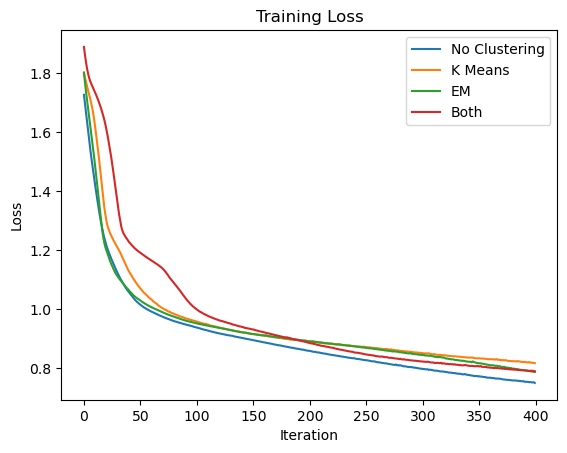

In [374]:
loss_df = pd.DataFrame(np.array([x.history['loss'] for x in [normal_res, kmeans_res, em_res, both_res]]).T, columns=['No Clustering', 'K Means', 'EM', 'Both'])
loss_df.plot(title='Training Loss', xlabel='Iteration', ylabel='Loss')
plt.savefig('clusteringtrainingloss')

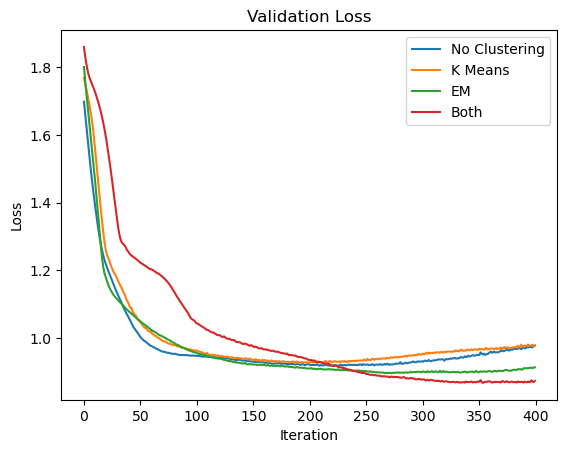

In [375]:
loss_df = pd.DataFrame(np.array([x.history['val_loss'] for x in [normal_res, kmeans_res, em_res, both_res]]).T, columns=['No Clustering', 'K Means', 'EM', 'Both'])
loss_df.plot(title='Validation Loss', xlabel='Iteration', ylabel='Loss')
plt.savefig('clusteringvalidationloss')

In [376]:
print("None: ", clf1.score(X_test, y_test))
print("KMeans: ", clf2.score(km_X_test, y_test))
print("EM: ", clf3.score(em_X_test, y_test))
print("Both: ", clf4.score(both_X_test, y_test))

2/2 [==============================] - 0s 4ms/step - loss: 1.0506 - accuracy: 0.5969
None:  0.596875011920929
2/2 [==============================] - 0s 4ms/step - loss: 0.9386 - accuracy: 0.6187
KMeans:  0.6187499761581421
2/2 [==============================] - 0s 5ms/step - loss: 0.9055 - accuracy: 0.6313
EM:  0.6312500238418579
2/2 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.6187
Both:  0.6187499761581421


In [377]:
times

{'normal': 16.105063676834106,
 'kmeans': 15.878774642944336,
 'em': 15.93182897567749,
 'both': 15.52330994606018}